# Uma Breve Introdução aos Algoritmos de Otimização de Hiperparâmetros

# Introdução 
A otimização é um dos principais componentes do aprendizado de máquina. A essência da maioria dos algoritmos de aprendizado de máquina é construir um modelo de otimização e aprender os parâmetros da função objetivo a partir dos dados fornecidos.

Quase todos os algoritmos de aprendizado de máquina podem ser formulados como um problema de otimização para encontrar o extremo de uma função objetivo.

Em aprendizagem supervisionada, o objetivo é encontrar uma função $f(x)$ para minimizar a função de perda.

$$
min_{\theta}\frac{1}{N}\sum_{i=1}^{N}L(y^{i},f(x^{i},\theta))
$$

onde $N$ é o número de amostras de treinamento, $\theta$ é o parâmetro da função de mapeamento, $x_i$ é o vetor de características do i-ésimo amostras, $y_i$ é a variável resposta e $L$ é o termo penalizador da função.

Existem dois tipos de parâmetros em modelos de aprendizado de máquina: aquele que pode ser inicializado e atualizado através do processo de aprendizagem de dados (por exemplo em uma arvore de decisão, divisão dos dados em cada nó da árvore).

E os parâmetros que são intrínsecos aos modelos, pois representam suas características, como número de interações, tamanho da árvore, etc. Esses parâmetros precisam ser escolhidos antes do início do processo de aprendizagem do algoritmo e são chamados de hiperparâmetros. O processo de seleção desses parâmetros para melhorar o desempenho do modelo é conhecido como tuning.



<img src="img/decision.png" alt="drawing" width="800" class="center"/> Existem dois tipos de parâmetros em modelos de aprendizado de máquina: aquele que pode ser inicializado e atualizado através do processo de aprendizagem de dados (por exemplo em uma arvore de decisão, divisão dos dados em cada nó da árvore).

E os parâmetros que são intrínsecos aos modelos, pois representam suas características, como número de interações, tamanho da árvore, etc. Esses parâmetros precisam ser escolhidos antes do início do processo de aprendizagem do algoritmo e são chamados de hiperparâmetros. O processo de seleção desses parâmetros para melhorar o desempenho do modelo é conhecido como tuning.

O processo de ajuste de hiperparâmetros é geralmente tratado como um problema de otimização de caixa preta. Formalmente, podemos definir o problema da seguinte forma:
$$
    \mathcal{H} = \mathcal{H}_1 \times \mathcal{H}_2 \times ... \times \mathcal{H}_k
$$
onde $\mathcal{H}$ é o espaço do hiperparâmetro e um algoritmo $a \in \mathcal{A}$, onde $\mathcal{A}$ é um conjunto de algoritmos de aprendizado de máquina. Cada $\mathcal{H}_i$ representa um conjunto de valores possíveis para o hiperparâmetro $i^{th}$ de $a$ ($i \in {1, ..., k}$). Seja $\mathcal{D}$ um conjunto de dados, onde $D \in \mathcal{D}$ é um conjunto de dados específico em $\mathcal{D}$. A função $f: \mathcal{A} \times \mathcal{D} \times \mathcal{H} \rightarrow \mathbb{R}$ calcula o desempenho do modelo usando o algoritmo $a \in \mathcal{A}$ no conjunto de dados $D \in \mathcal{D}$ dada a configuração do hiperparâmetro $h = (h_1, h_2, ..., h_k) \in \mathcal{H}$.

Dados $a \in \mathcal{A}$, $\mathcal{H}$ e $D \in \mathcal{D}$, o objetivo de ajustar os hiperparâmetros é encontrar $h^* = (h_1^, h_2^, ..., h_k^*)$ tal que:

$$h^* = argmax_{h\in\mathcal{H}}f(a,D,h)$$

![](img/pipeline.png)

Nos últimos anos tivemos muitos avanços em tecnicas automaticas para otimização de hiperparâmetros, isso é de extrema importancia pois muitos problemas de otimização de hiperparâmetros são problemas de otimização não convexos ou não diferenciáveis.

Os métodos de combinação de hiperparâmetros dado um espaço de busca, **Grid Search, Random Search**

E os métodos de **Otimização Bayesiana** que determinam o próximo valor do hiperparâmetro com base nos resultados anteriores, evitando avaliações descenessárias, detectando uma combinação ideal com menos interações.

Ao contrário de GS e RS, os modelos de otimização Bayesiana (BO) [14] determinam o
próximo valor do hiperparâmetro com base nos resultados anteriores do hiperparâmetro testado
valores de parâmetros, o que evita muitas avaliações desnecessárias; assim, BO pode
detectar a combinação ideal de hiperparâmetros em menos iterações do que
GS e RS. Para ser aplicado a diferentes problemas, BO pode modelar a distribuição
ção da função objetivo usando diferentes modelos como função substituta,
incluindo processo gaussiano (GP), floresta aleatória (RF) e estruturada em árvore
Modelos de estimadores de Parzen (TPE)

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
import gc
import lightgbm
import warnings
warnings.filterwarnings('ignore')

In [115]:
d = datasets.load_digits()
X = d.data
y = d.target

In [116]:
d

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1257, 64), (540, 64), (1257,), (540,))

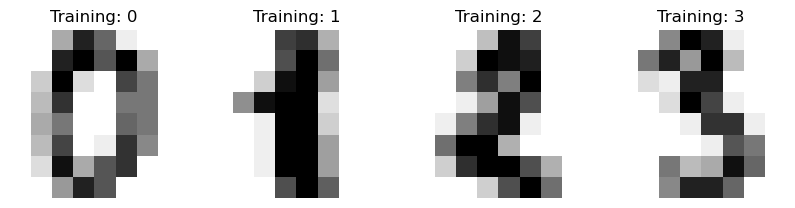

In [118]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

In [139]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
rf_base_score = scores.mean()
print("Accuracy:"+ str(rf_base_score))

Accuracy:0.9376739009460211


In [140]:
#LGBM
lgbmparameters = {'verbose': -1}
clf = LGBMClassifier(**lgbmparameters)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
lgbm_base_score = scores.mean()
print("Accuracy:"+ str(lgbm_base_score))

Accuracy:0.9271007234279355


## Otimizador Humano
![](img/human_optimizer.png)

## Otimizador Humano

## Prós
* Você aprende muito sobre o seu modelo/sistema.

## Contras
* Não muito eficiente
* sujeito a erros
* Requer conhecimento especializado

In [142]:
#Random Forest
parameters = {'n_estimators':15, 'max_depth': 25}
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Diff:"+ str(100*(scores.mean()-rf_base_score)/rf_base_score)+'%')

Diff:0.8902077151335395%


In [143]:
#LGBM
parameters = {'verbose': -1, 'learning_rate':0.01, 'max_depth': 32}
clf = LGBMClassifier(**parameters)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Diff:"+ str((scores.mean()-lgbm_base_score)*100/lgbm_base_score)+'%')

Diff:-5.40216086434574%


## Grid search
Simplesmente faz uma pesquisa completa em um determinado subconjunto do espaço de hiperparâmetros, precisamos especificar um limite para aplicar esse método.

1. Comece com um grande espaço de pesquisa e tamanho de passo.
2. Limite o espaço de pesquisa e o tamanho do passo com base nos resultados anteriores de
configurações de hiperparâmetros com bom desempenho.
3. Repita a etapa 2 várias vezes até atingir o nível ideal.

Para GS, assumindo que existem $k$
parâmetros, e cada um deles possui $n$ valores distintos, a complexidade aumenta em $\mathcal{O}(n^k)$

![](img/grid_layout.png)

## Gird Search

## Prós
* Muito simples
* Pode ser paralelizado, pois os valores dos hiperparâmetros geralmente são independentes uns dos outros
* Pode ser usado para estudar o problema

## Contras
* Não escala para dimensões altas
* A grade precisa ser definida
* Computacionalmente caro

In [129]:
#Random Forest
parameters = {'n_estimators':15, 'max_depth': 25}
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Diff:367.80952380952385%


In [82]:
#LGBM
parameters = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = LGBMClassifier(random_state=0,verbose=-1)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Diff:"+ str((scores.mean()-lgbm_base_score)*100/lgbm_base_score)+'%')

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Diff:1.8007202881152509%


## Random Search
É semelhante a GS mas, em vez de testar todos os valores na pesquisa de espaço, ele seleciona aleatoriamente um número predefinido de amostras entre o limites superior e inferior como valores de hiperparâmetros candidatos e, em seguida, treina estes candidatos até um número de interações.

A base teórica do RS é que se o espaço de configuração for grande o suficiente, então os ótimos globais, ou pelo menos suas aproximações, podem ser detectados. Random Search é capaz de explorar um espaço de pesquisa maior que Grid Search.

Como o número total de avaliações é definido para um valor fixo $n$ antes do início do processo de tunagem, a complexidade computacional é $\mathcal{O}(n)$

Ele substitui a seleção completa de todas as combinações por suas combinações aleatórias.
seleção. Isto pode ser facilmente aplicado a casos discretos, mas o método pode ser generalizado
para espaços contínuos e mistos.

![](img/random_layout.png)

## Random Search

## Prós
* Muito simples
* Pode ser paralelizado
* Eventualmente converge para o ideal

## Contras
* Não escala para dimensões altas
* Não é eficiente em termos de dados
* Computacionalmente caro

In [85]:
params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
scores = RandomizedSearchCV(clf, param_distributions=params,n_iter=n_iter_search,cv=3,scoring='accuracy')
scores.fit(X, y)
print(scores.best_params_)
print("Diff:"+ str(100*(scores.best_score_-rf_base_score)/rf_base_score)+'%')

{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 74}
Diff:-0.9478672985781914%


In [91]:
# lgbm
params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = LGBMClassifier(random_state=0,verbose=-1)
Random = RandomizedSearchCV(clf, param_distributions=params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Diff:"+ str(100*(Random.best_score_-lgbm_base_score)/lgbm_base_score)+'%')

{'criterion': 'entropy', 'max_depth': 46, 'max_features': 58, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 94}
Diff:-0.6602641056422582%


##  Baysian Optimization
![](img/bayesian_layout.png)

##  Otimização Bayesiana
Assim como para o modelo de Random Search, você passa faixas de valores a serem testados e uma métrica de avaliação a ser maximizada. Porém, após um número pré-definido de iterações com valores aleatórios, o algoritmo cria um modelo surrogate que estima a função objetivo da métrica selecionada. Cada ponto nessa função representa a probabilidade de se um obter uma determinada pontuação para a métrica de avaliação dado um valor de hiperparâmetro (em termos matemáticos: P(pontuação| hiperparâmetro)).

Além disso, ele utiliza uma função de aquisição (ou seleção) para selecionar o próximo ponto a ser testado. Essa função representa o critério que será utilizado para escolher o valor de hiperparâmetro da próxima iteração. Geralmente se usa o Expected Improvement (Melhoria Esperada), que indica a probabilidade de um valor de hiperparâmetro obter um resultado melhor que o atual. Sendo assim, estamos interessados no valor de hiperparâmetro que maximizará essa função.


## Otimização Bayesiana
Na imagem abaixo, a curva sombreada com verde representa a função de aquisição e a curva sombreada de azul, a função surrogate. A linha vermelha indica o valor máximo da função de aquisição, sendo assim, o valor do hiperparâmetro em seu ponto correspondente na função surrogate (ponto vermelho) será o próximo a ser testado.
![](https://miro.medium.com/max/436/1*9EszMI-ff2PbEPl38LpMQw.png)

Após o teste, a função surrogate será atualizada com a pontuação real obtida para aquele valor de hiperparâmetro. Portanto, a cada iteração a função surrogate será aperfeiçoada e o algoritmo tenderá a encontrar os melhores valores para os hiperparâmetros que queremos otimizar.

Como vimos, diferente dos outros métodos, a Otimização Bayesiana “aprende” com cada teste feito, sendo mais eficaz na seleção da melhor combinação de hiperparâmetros.


1. Construa um modelo substituto probabilístico da função objetivo.
2. Detecte os valores ideais de hiperparâmetros no modelo substituto.
3. Aplique esses valores de hiperparâmetros à função objetivo real para avaliá-los.
4. Atualize o modelo substituto com novos resultados.
5. Repita as etapas 2 a 4 até atingir o número máximo de iterações.

No entanto, como os modelos de otimização bayesiana são executados com base no valores previamente testados, são quase impossíveis de paralelizar, mas eles geralmente podem detectar hiperparâmetros quase ideais
combinações dentro de algumas iterações.

## Pro
* Dados eficientes
* Estado da arte
* Exploração/exploração de compensação

## Cons
* Não escala com recursos paralelos

In [238]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

## Exemplo Otimização Bayesiana

Vamos criar uma função 1-D de destino com vários máximos locais para testar e visualizar como o pacote [BayesianOptimization](https://github.com/fmfn/BayesianOptimization) funciona. A função alvo que tentaremos maximizar é a seguinte:

$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^2 + 1}, $$ seu máximo está em $x = 2$ e restringiremos o intervalo de interesse a $x \in (-2, 10)$.

Observe que, na prática, esta função é desconhecida, a única informação que temos é obtida sondando-a sequencialmente em diferentes pontos. A Otimização Bayesiana funciona construindo uma distribuição posterior de funções que melhor se ajustam aos dados observados e escolhendo o próximo ponto de sondagem equilibrando exploração e aproveitamento.

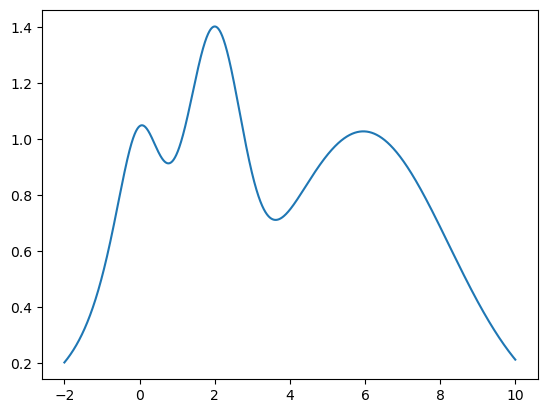

In [245]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

## Crie um objeto BayesianOptimization

Insira a função alvo a ser maximizada, suas variáveis ​​e seus intervalos correspondentes. É necessário um número mínimo de 2 suposições iniciais para iniciar os algoritmos; elas podem ser aleatórias ou definidas pelo usuário.

In [241]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)

Neste exemplo, usaremos o Limite Superior de Confiança (UCB) como nossa função de utilidade. Tem o parâmetro free
$\kappa$ que controlam o equilíbrio entre exploração e aproveitamento; definiremos $\kappa=5$ o que, neste caso, torna o algoritmo bastante ousado.

In [224]:
acq_function = UtilityFunction(kind="ucb", kappa=5)
optimizer.maximize(init_points=2, n_iter=0, acquisition_function = acq_function)

|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.8198    | 3.109     |
| 2         | 0.746     | 7.775     |


In [225]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

In [246]:
def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

### Dois pontos aleatórios

Depois de sondarmos dois pontos aleatoriamente, podemos ajustar um Processo Gaussiano e iniciar o procedimento de otimização bayesiana. Dois pontos devem nos dar um cenário posterior sem intercorrências, com a incerteza aumentando à medida que nos afastamos das observações.

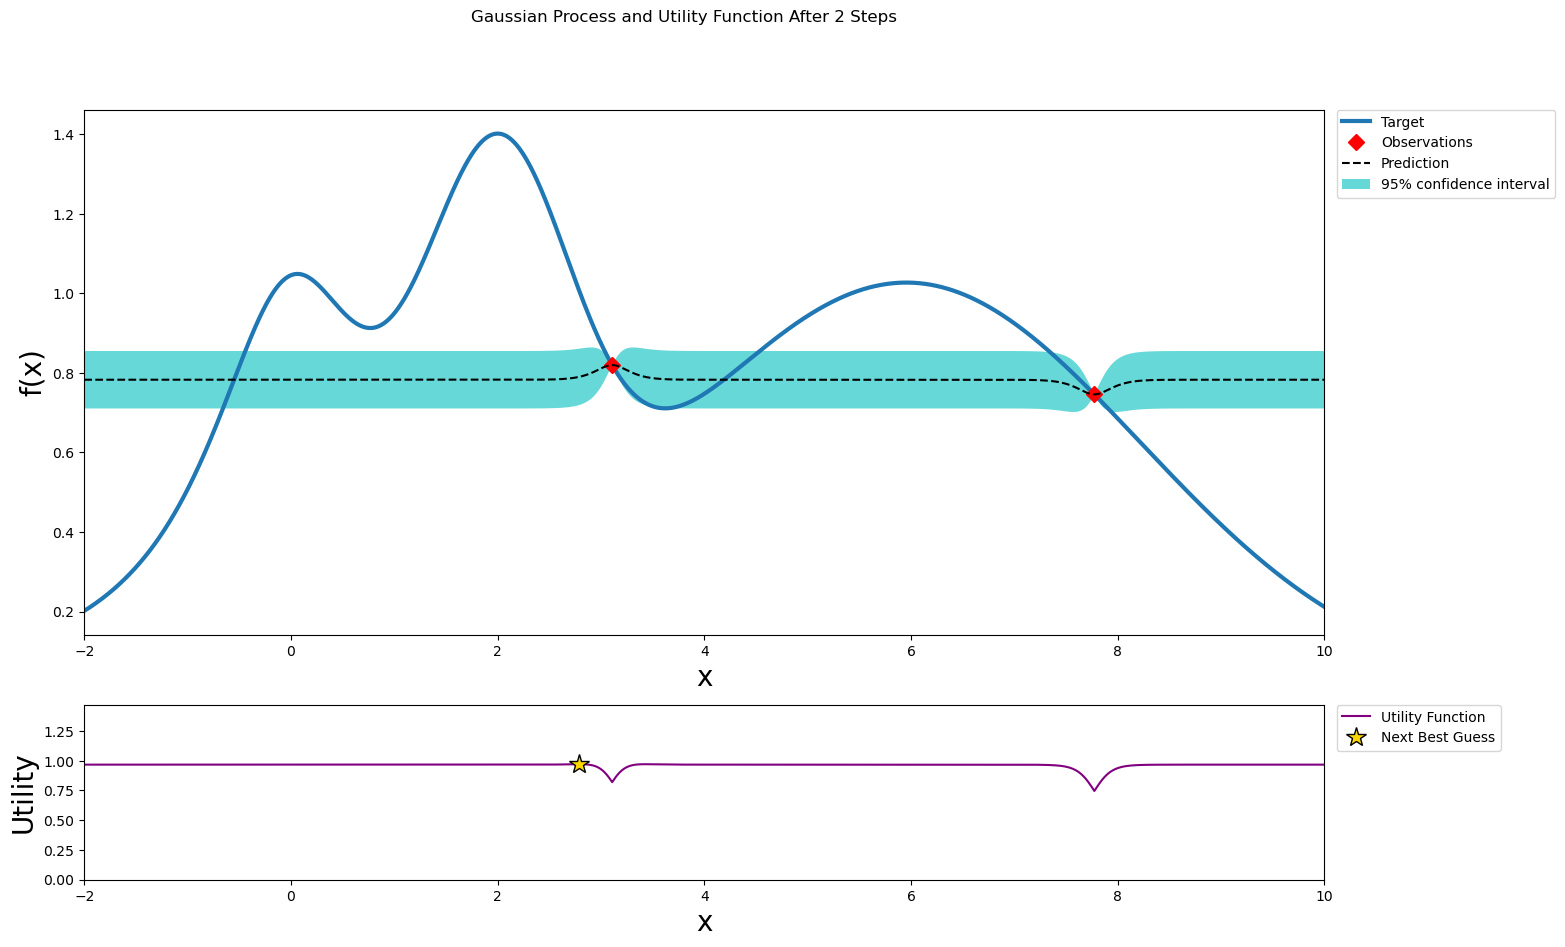

In [226]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 3         | 0.5234    | -0.9694   |


/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning:

The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



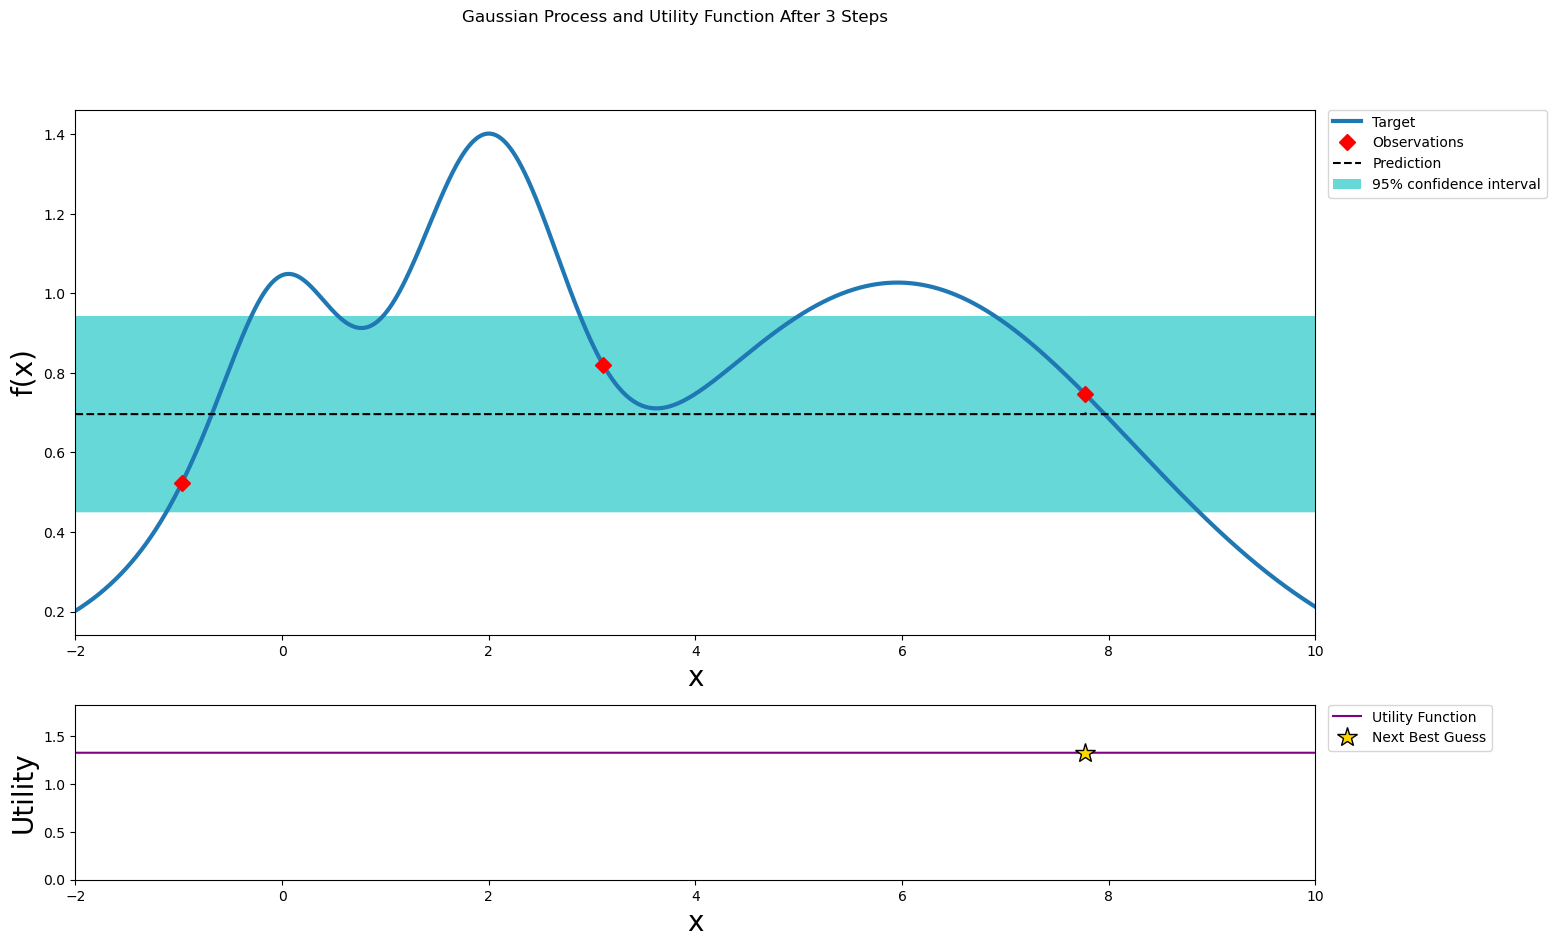

In [227]:
# +1 Processo Gaussiano
optimizer.maximize(init_points=0, n_iter=1)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 4         | 0.8164    | 3.116     |


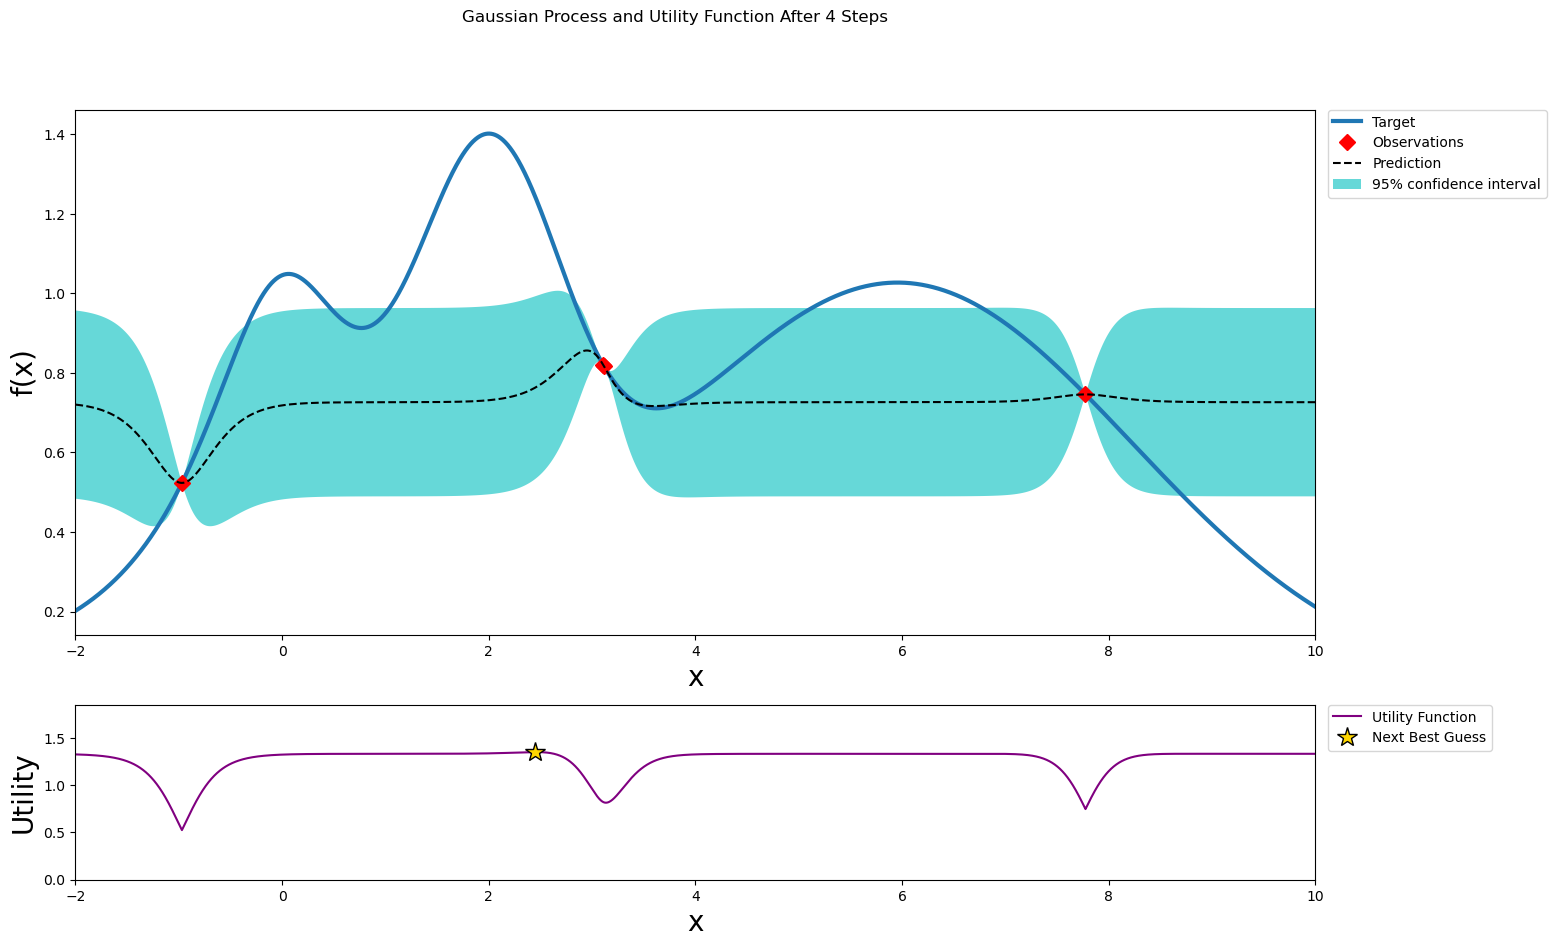

In [228]:
# +2 Processo Gaussiano
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 5         | 1.243     | 2.449     |


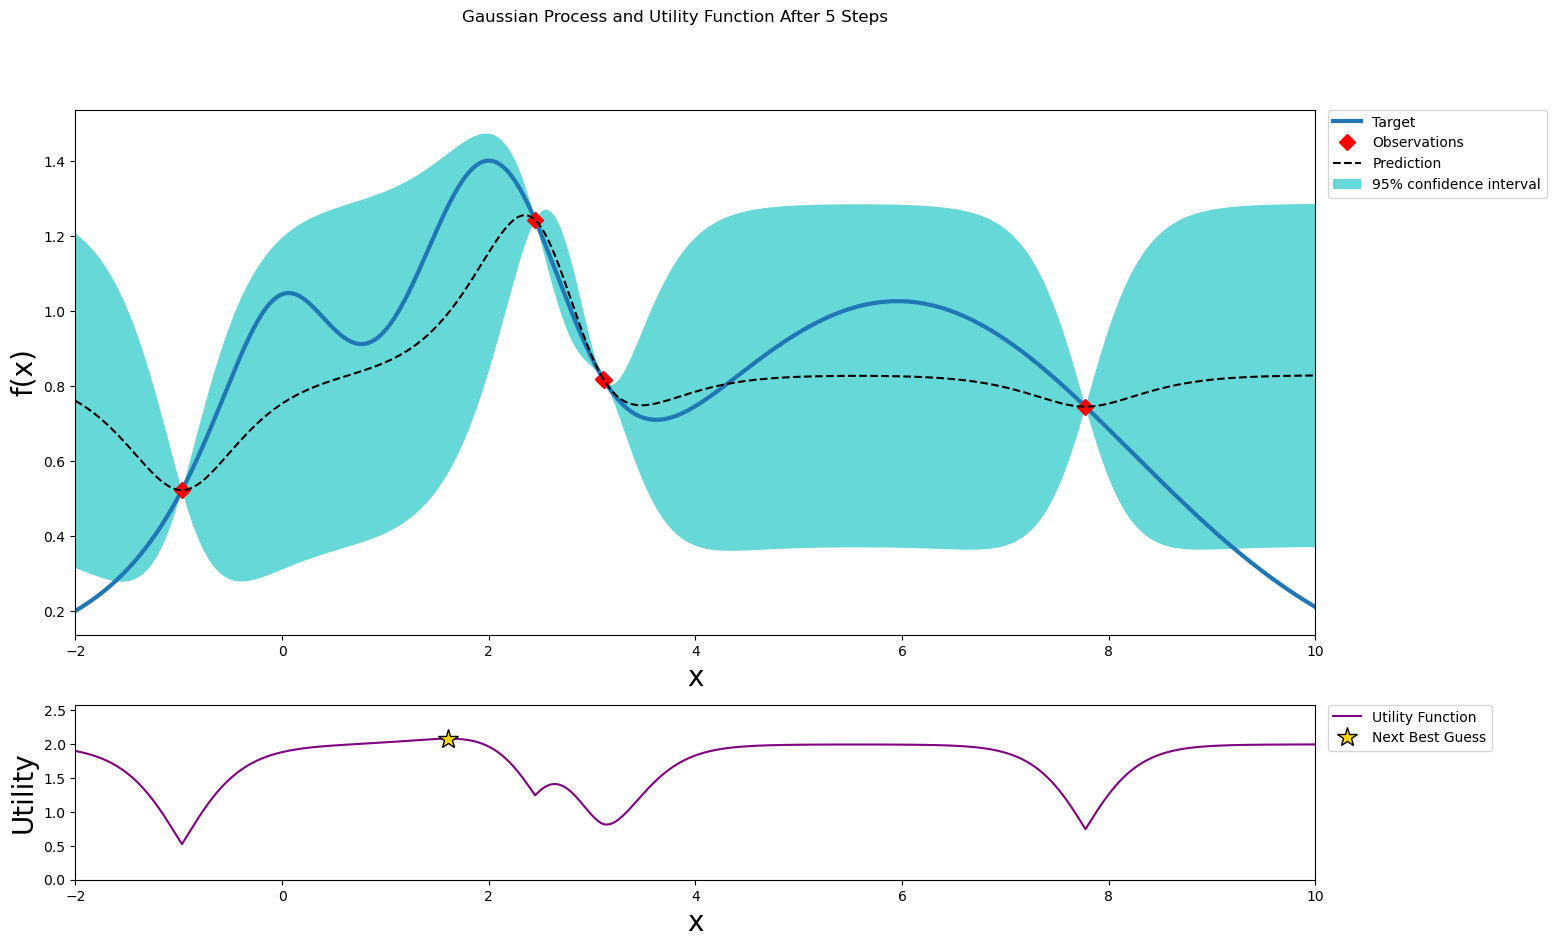

In [229]:
# +3 Processo Gaussiano
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 6         | 1.283     | 1.61      |


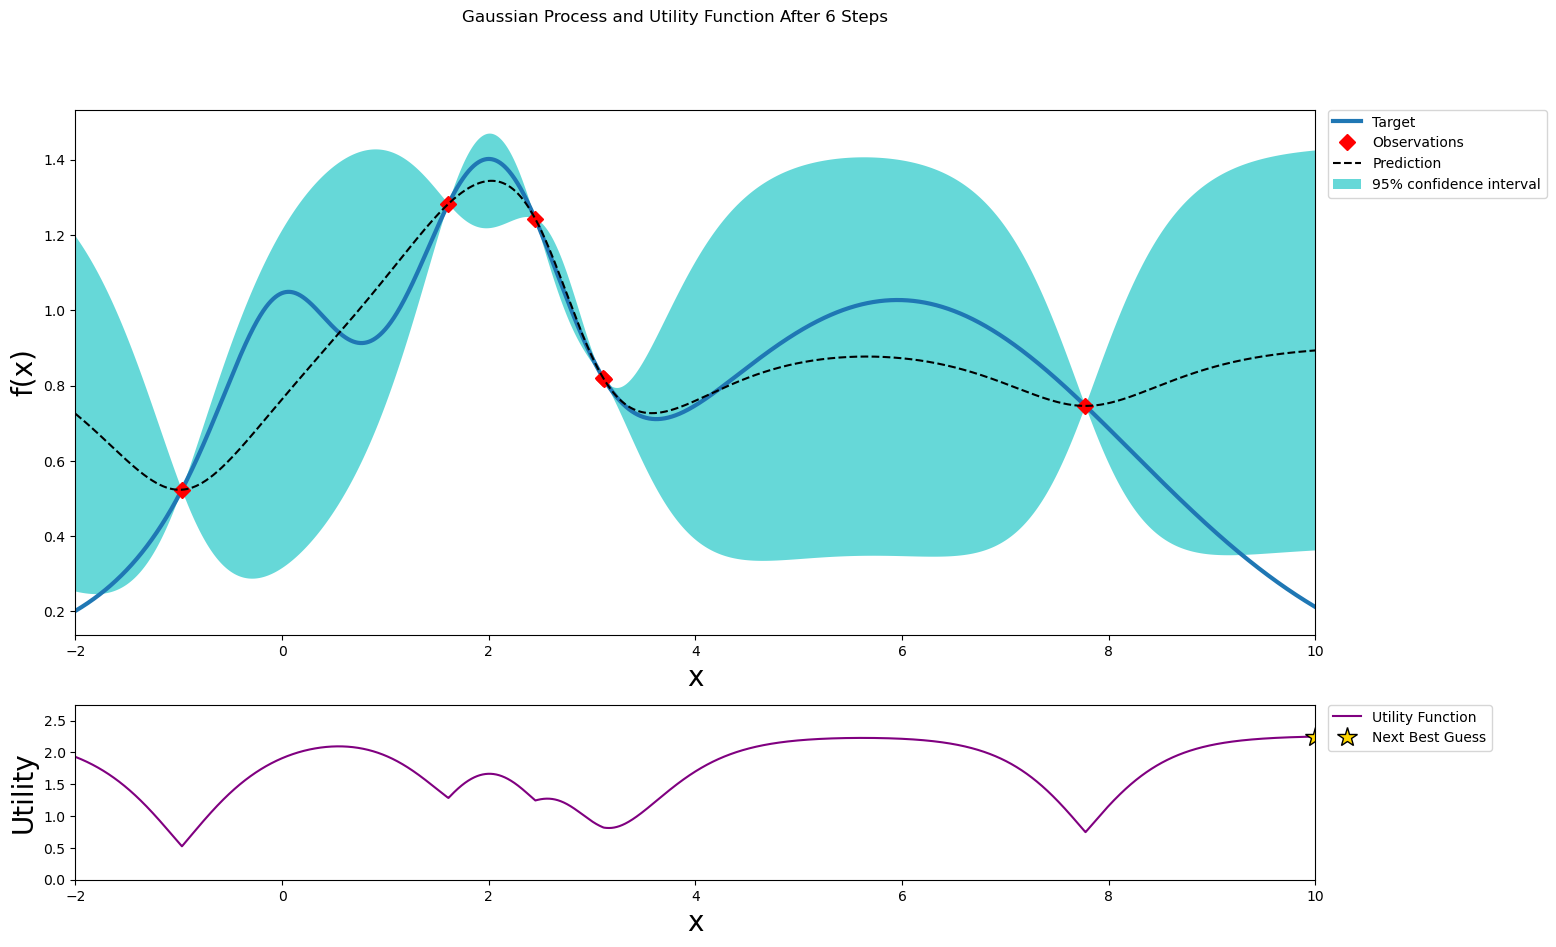

In [230]:
# +4 Processo Gaussiano
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 7         | 0.2118    | 10.0      |


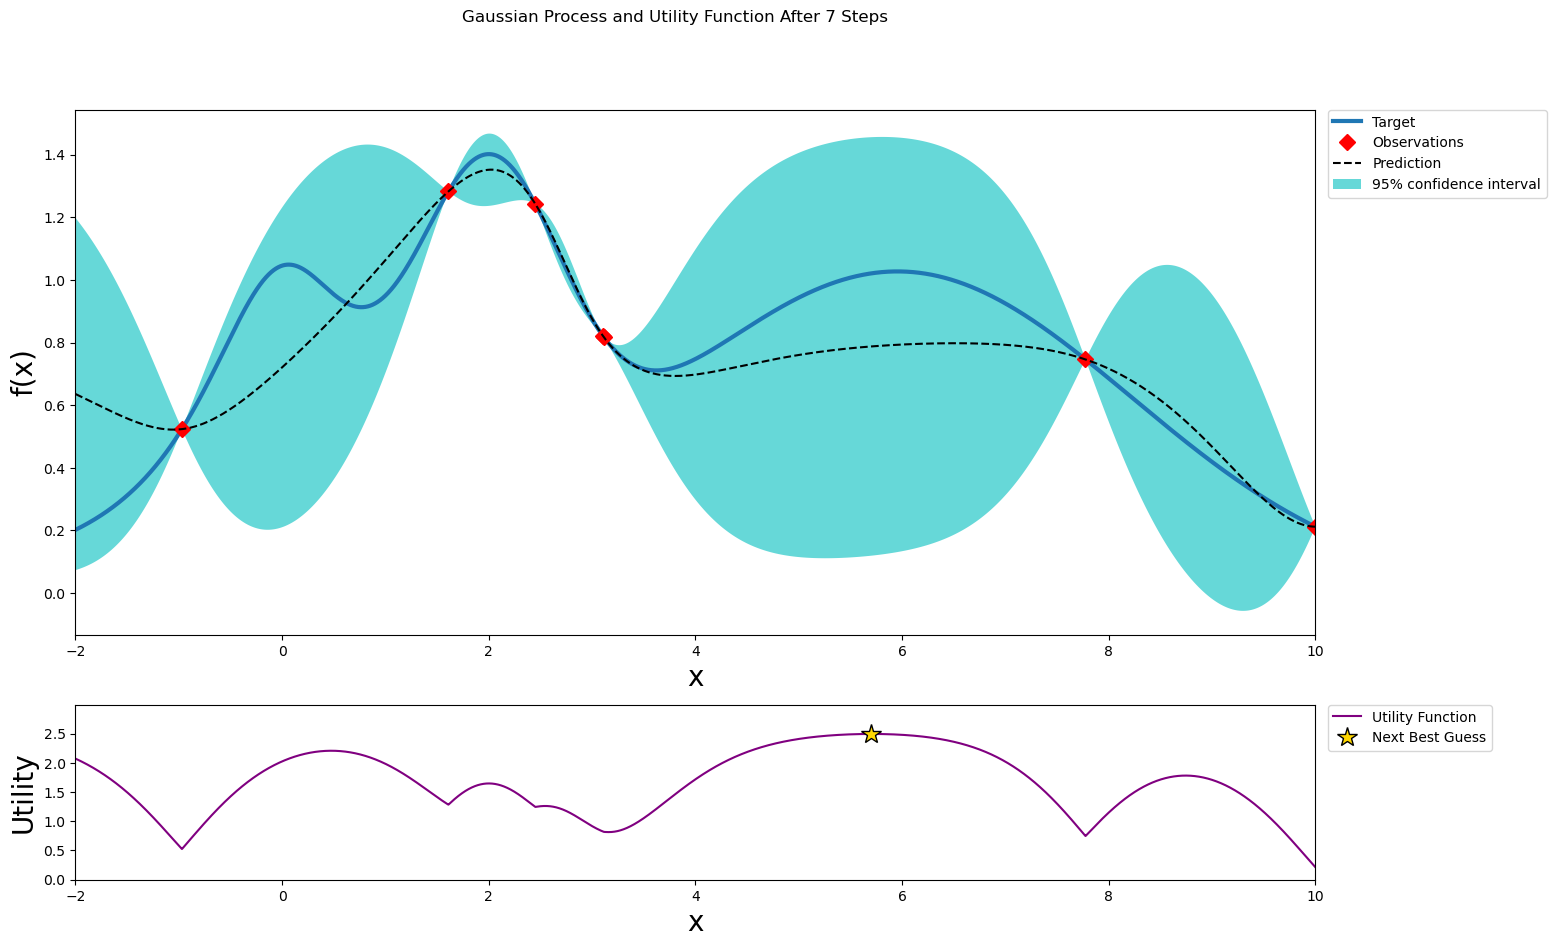

In [231]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

### After six steps of GP (and two random points)

|   iter    |  target   |     x     |
-------------------------------------
| 8         | 1.021     | 5.704     |


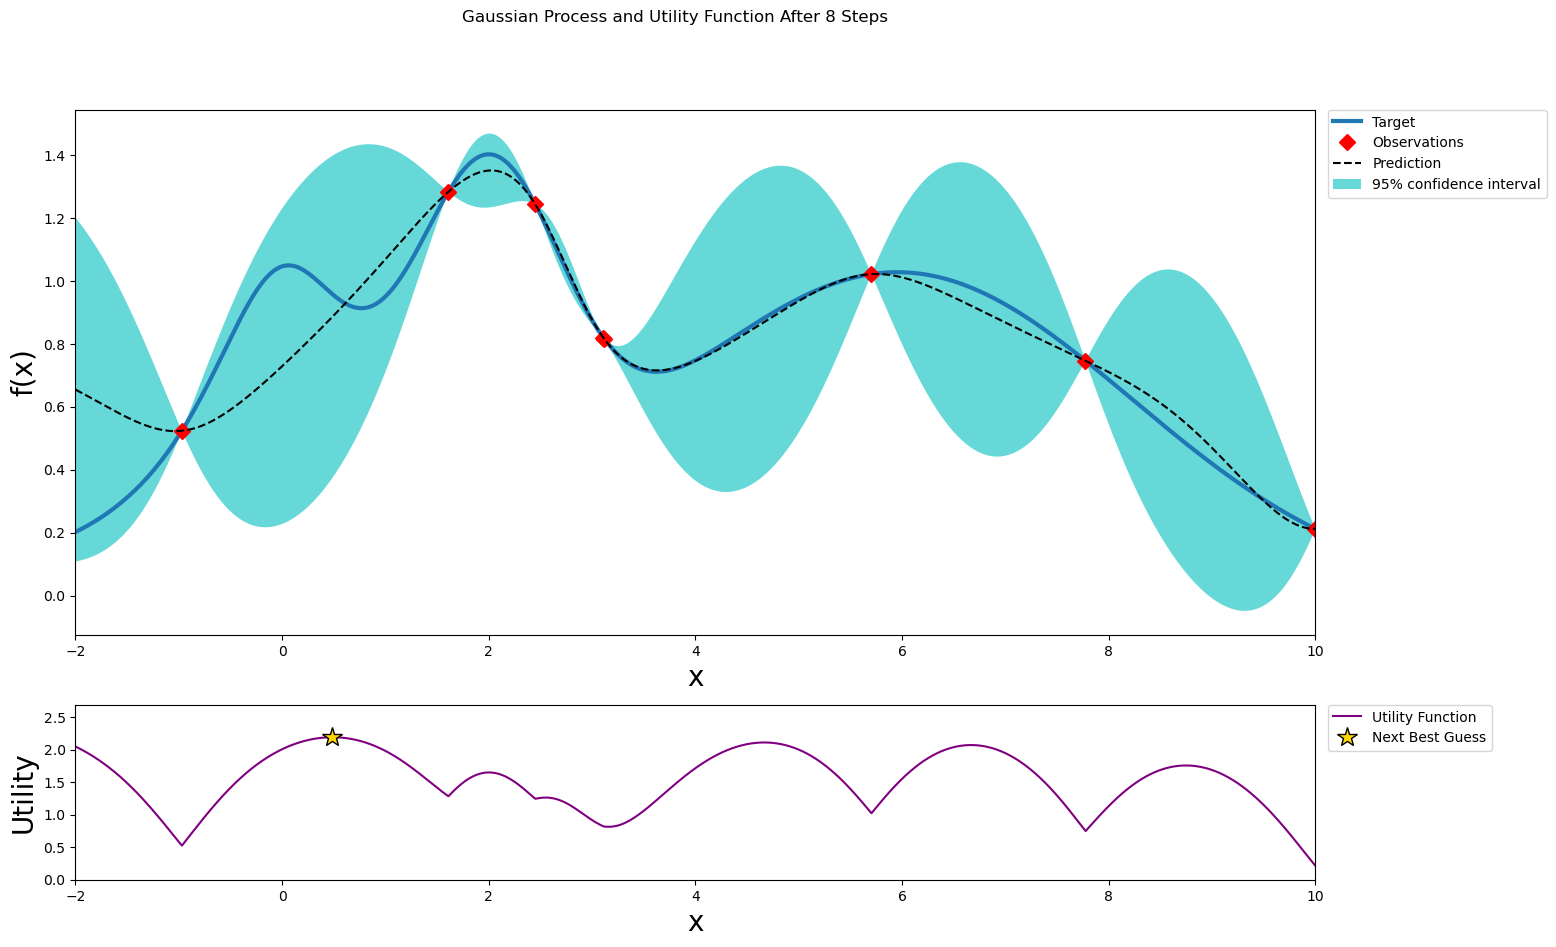

In [232]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

### After seven steps of GP (and two random points)

|   iter    |  target   |     x     |
-------------------------------------
| 9         | 0.9572    | 0.488     |


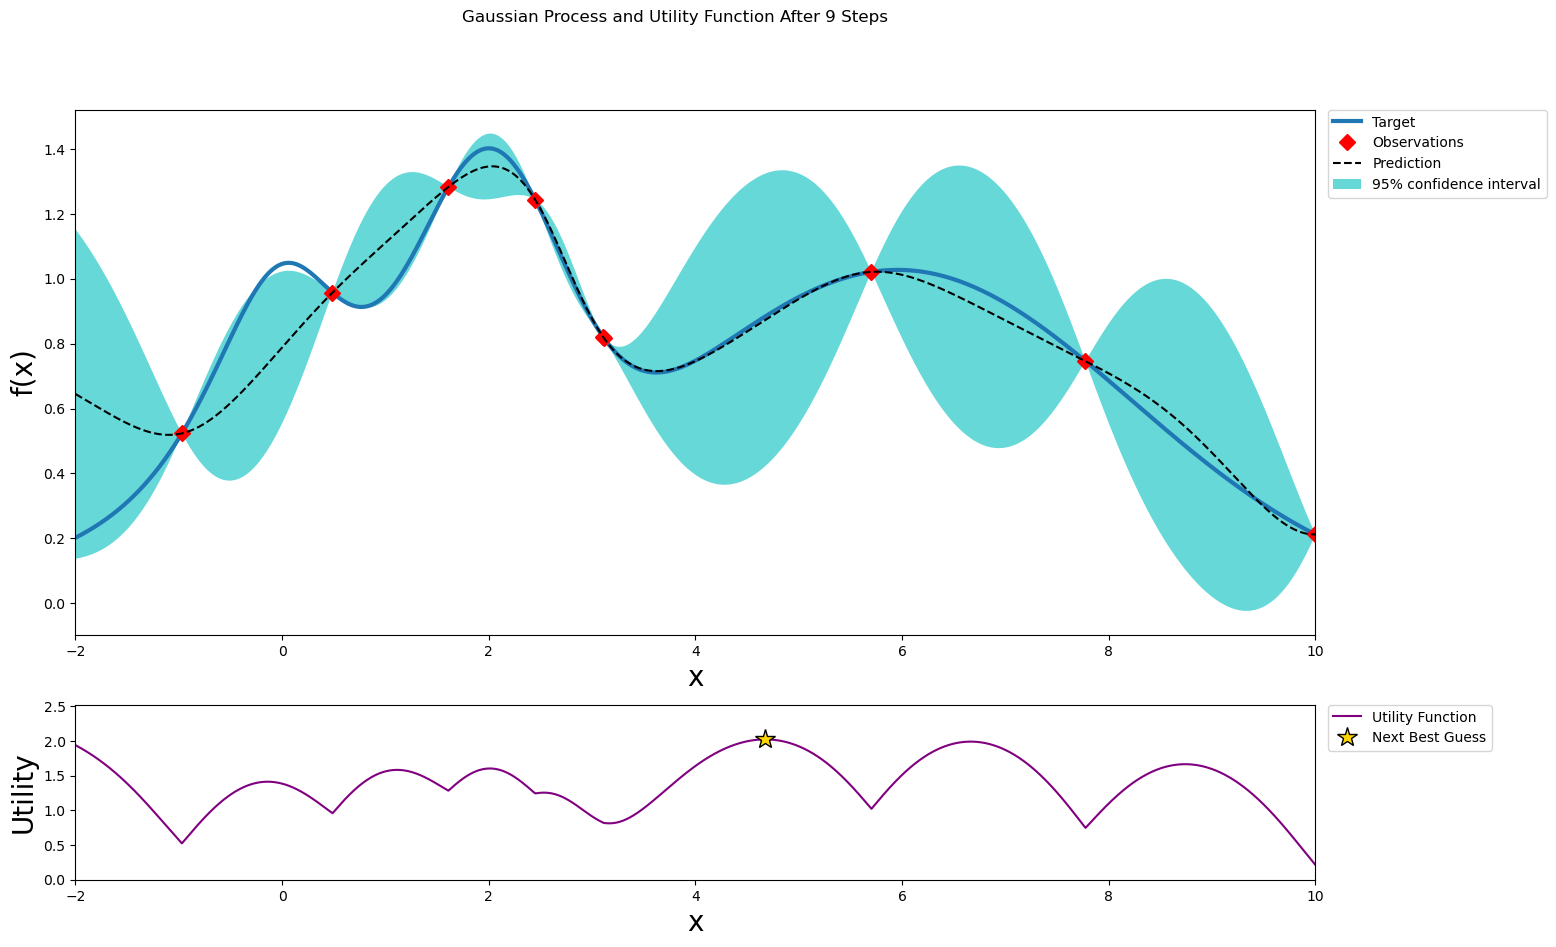

In [233]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 10        | 0.8836    | 4.675     |


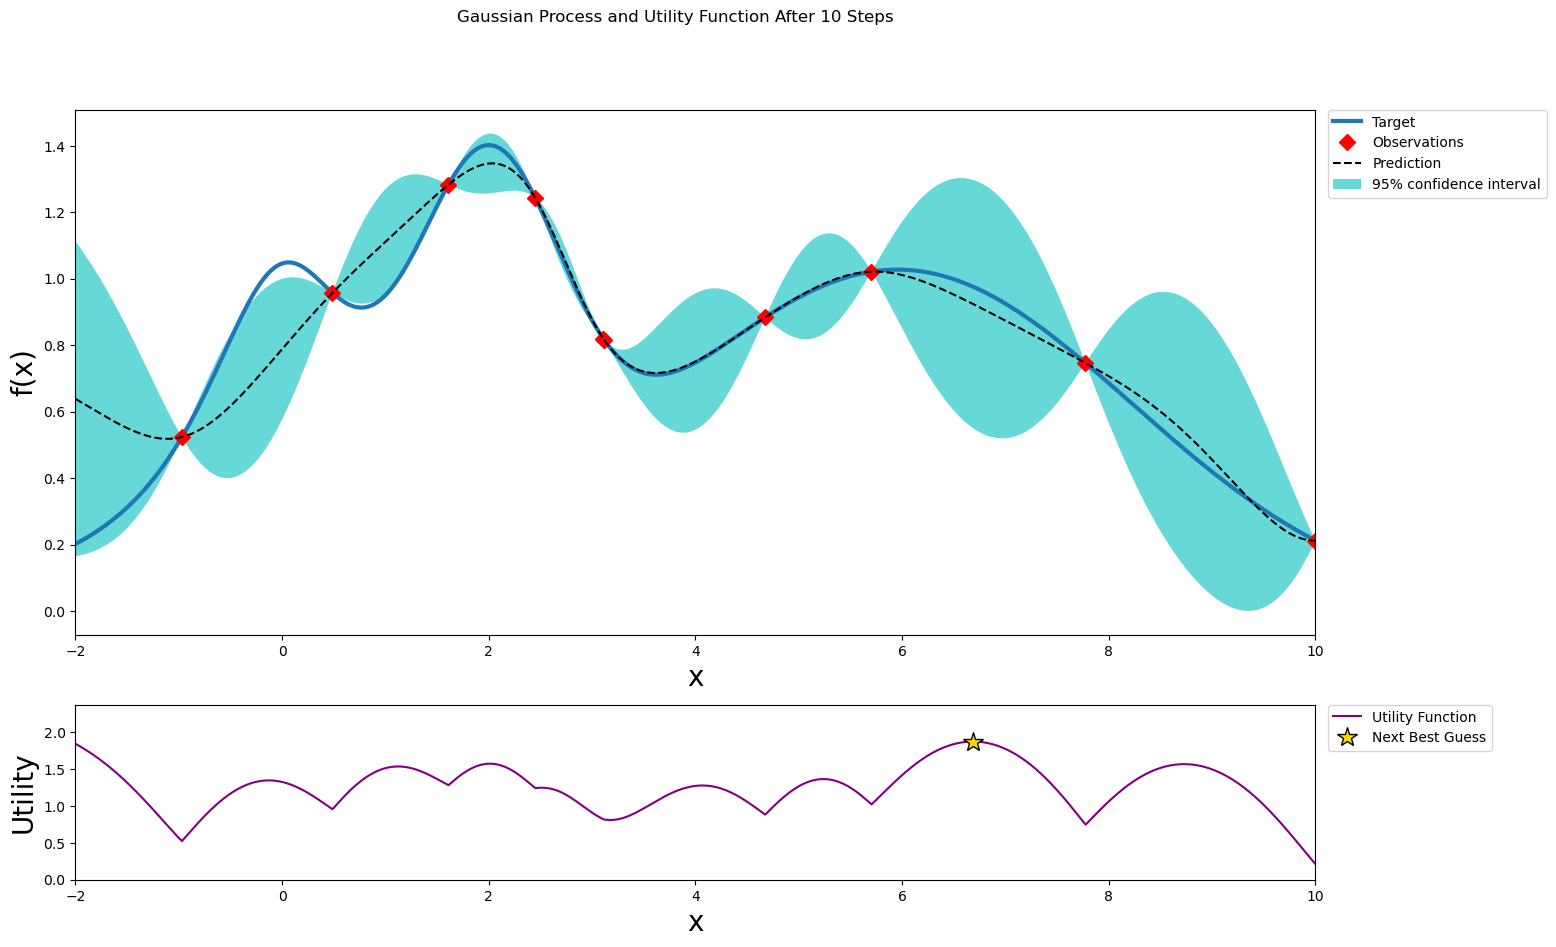

In [234]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 11        | 0.9759    | 6.686     |


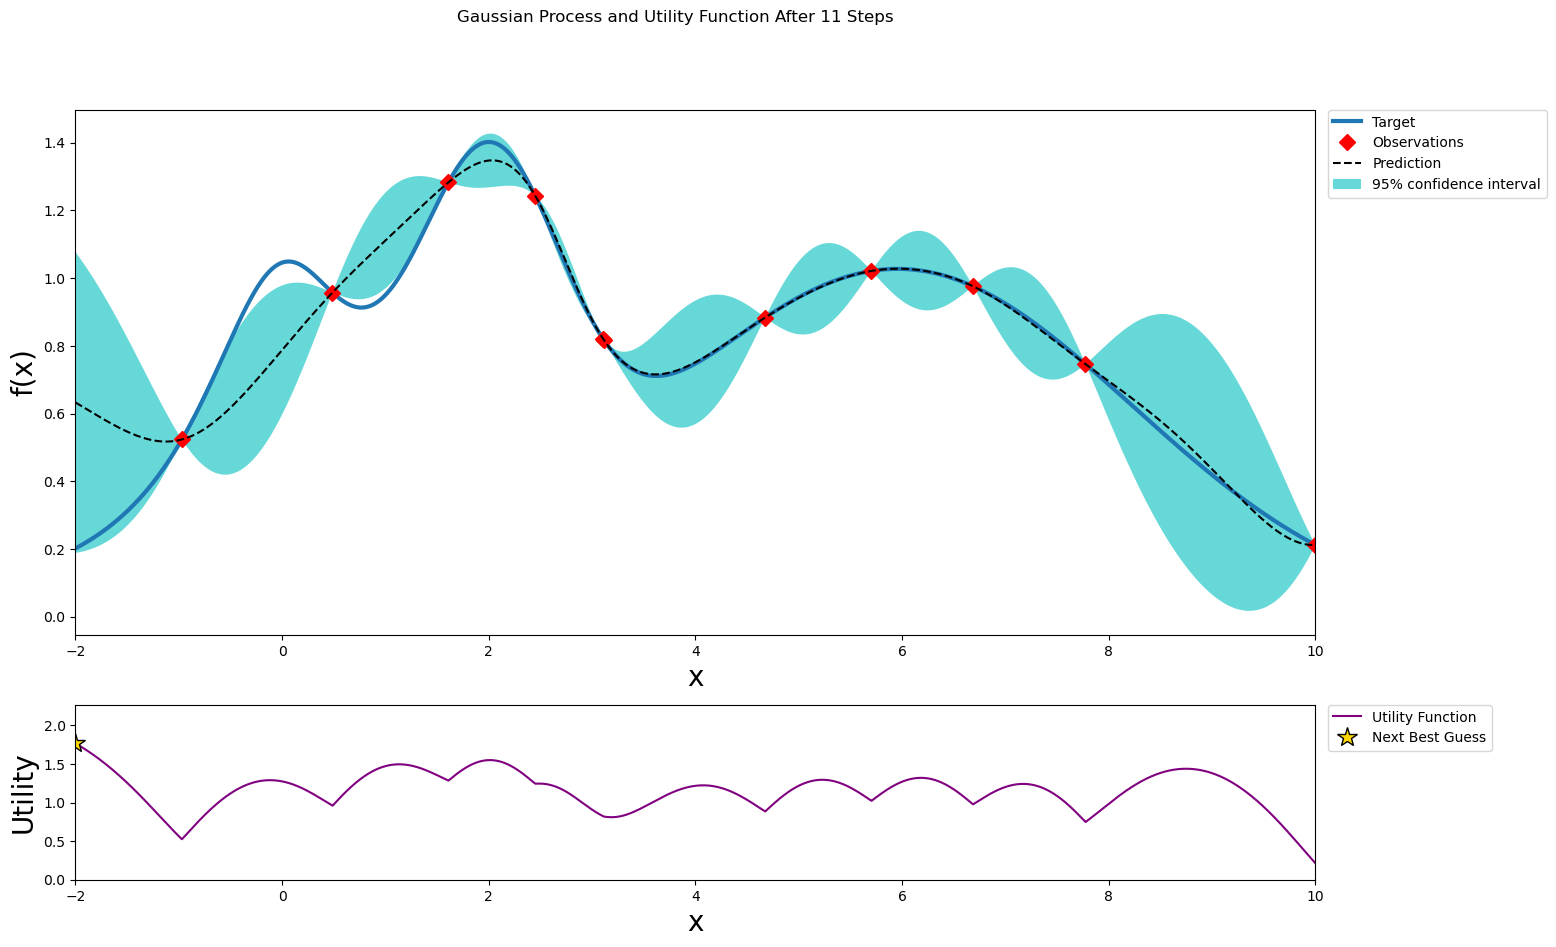

In [235]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 12        | 0.2017    | -2.0      |


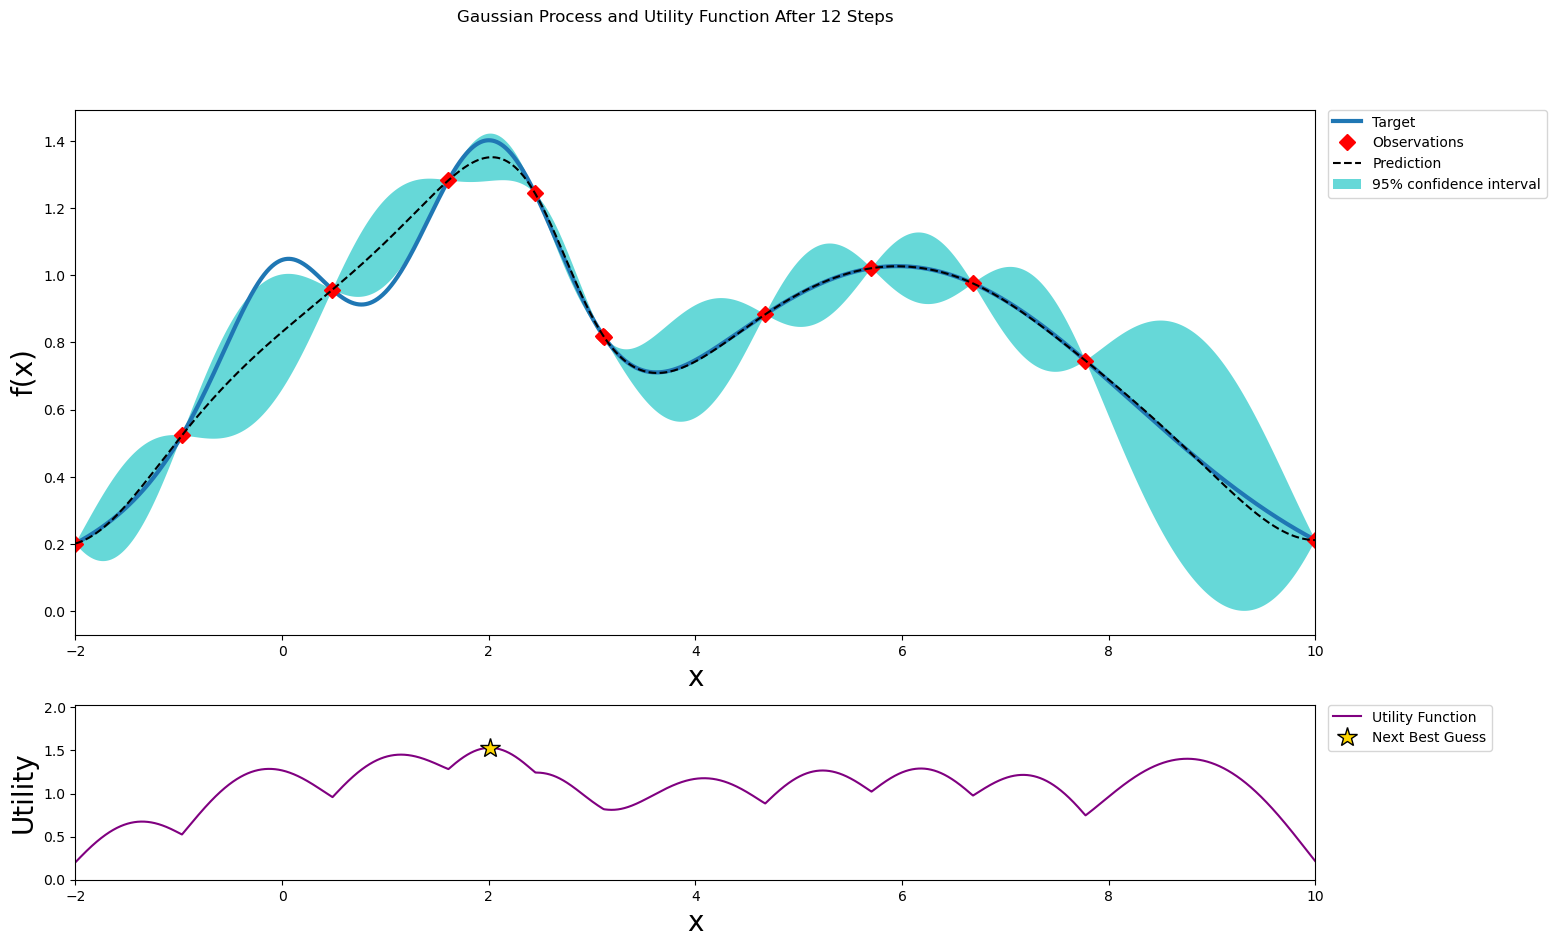

In [236]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 13        | 1.402     | 2.01      |


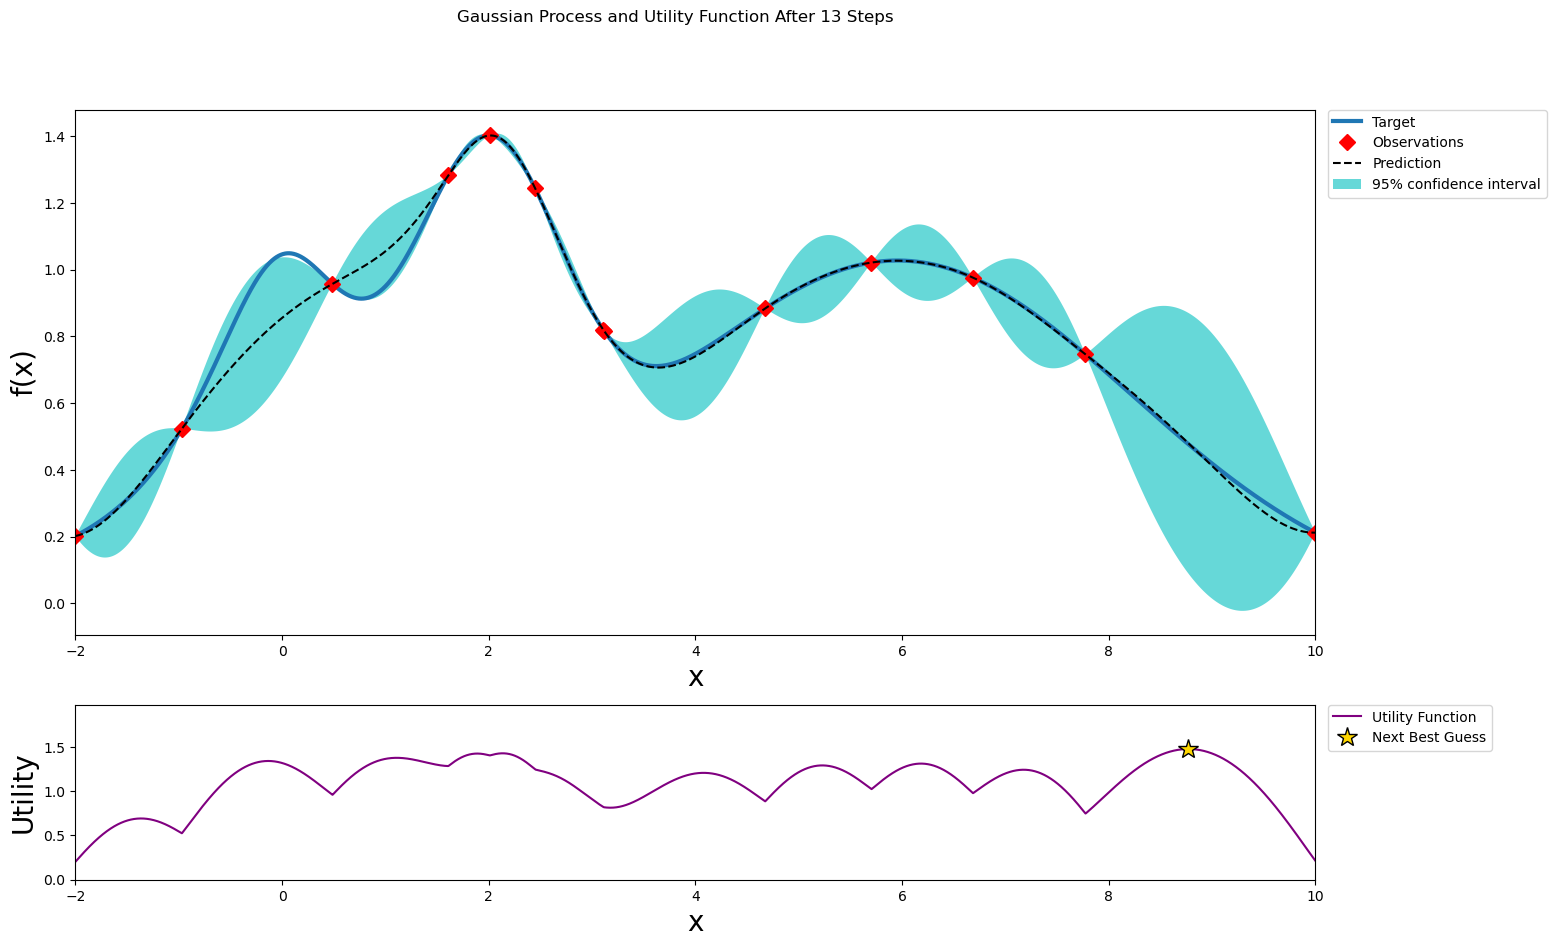

In [237]:
# +13 Processo Gaussiano
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

Depois de apenas alguns pontos, o algoritmo conseguiu chegar bem perto do máximo verdadeiro. É importante notar que o compromisso entre exploração (explorar o espaço de parâmetros) e exploração (sondagem de pontos próximos ao máximo atual conhecido) é fundamental para um procedimento de otimização bayesiana bem-sucedido. A função de utilidade usada aqui (Upper Confidence Bound - UCB) possui um parâmetro livre $\kappa$ que permite ao usuário tornar o algoritmo mais ou menos conservador. Além disso, quanto maior o conjunto inicial de pontos aleatórios explorados, menor será a probabilidade de o algoritmo ficar preso em mínimos locais por ser muito conservador.

## BO-TPE
O estimador Parzen estruturado em árvore (TPE) [12] é outro substituto comum
modelo de portão para BO. Em vez de definir uma distribuição preditiva usada em BO-
GP, BO-TPE cria duas funções de densidade, l(x) e g(x), para atuar como
modelos generativos para todas as variáveis ​​de domínio [3]. Para aplicar o TPE, a observação
resultados da operação são divididos em bons resultados e maus resultados por um padrão pré-definido.
percentil y ∗ , e os dois conjuntos de resultados são modelados por simples vitórias de Parzen
pontos [12]
Depois disso, a melhoria esperada na função de aquisição é re-
refletido pela razão entre as duas funções de densidade, que é usada para
determinar as novas configurações para avaliação. Os estimadores de Parzen são
organizado em uma estrutura de árvore, então as dependências condicionais especificadas são
retida. Portanto, o TPE suporta naturalmente hiper-
parâmetros [91]. A complexidade de tempo do BO-TPE é O (nlogn), que é
menor que a complexidade do BO-GP
Os métodos BO são eficazes para muitos problemas de HPO, mesmo que o objetivo
a função f é estocástica, não convexa ou não contínua. No entanto, o principal
A desvantagem dos modelos BO é que, se eles não conseguirem alcançar o equilíbrio entre
exploração e exploração, eles podem atingir apenas um local em vez de um global
ótimo. O RS não tem essa limitação, pois não se concentra em nenhum
área especifica. Além disso, é difícil paralelizar modelos BO, uma vez que seus
resultados intermediários dependem uns dos outros

## Optuna

In [97]:
import optuna
from optuna.visualization import plot_optimization_history
def objective(trial):
    x = trial.suggest_uniform('x',-1000,1000)
    return (x-2)**2
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2023-12-14 18:19:49,359] A new study created in memory with name: no-name-1038e665-df18-42a9-b856-5cad24f749c0
/tmp/ipykernel_333479/198692276.py:4: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2023-12-14 18:19:49,360] Trial 0 finished with value: 758173.2023018199 and parameters: {'x': -868.7314180054719}. Best is trial 0 with value: 758173.2023018199.
[I 2023-12-14 18:19:49,360] Trial 1 finished with value: 516694.3687605218 and parameters: {'x': 720.8145579775926}. Best is trial 1 with value: 516694.3687605218.
[I 2023-12-14 18:19:49,361] Trial 2 finished with value: 853736.0601088381 and parameters: {'x': -921.9783872520169}. Best is trial 1 with value: 516694.3687605218.
[I 2023-12-14 18:19:49,361] Trial 3 finished with value: 32249.3513085994 and parameters: {'x': 181.58104384538865}. Best is trial 3 with value: 32249.3513085994.
[I

[I 2023-12-14 18:19:49,443] Trial 48 finished with value: 54522.731076933356 and parameters: {'x': -231.5010301410539}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,444] Trial 49 finished with value: 111123.89765707962 and parameters: {'x': 335.3525126005197}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,446] Trial 50 finished with value: 7597.617389505673 and parameters: {'x': 89.16431259125304}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,448] Trial 51 finished with value: 140.17455233506922 and parameters: {'x': 13.839533450903765}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,450] Trial 52 finished with value: 27546.040719519213 and parameters: {'x': -163.9699994562849}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,451] Trial 53 finished with value: 11993.477413943632 and parameters: {'x': -107.51473605841194}. Best is trial 31 with value: 0.54622040195

[I 2023-12-14 18:19:49,532] Trial 97 finished with value: 9248.182037486951 and parameters: {'x': 98.16746870687068}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,534] Trial 98 finished with value: 10983.582119139659 and parameters: {'x': -102.80258641436126}. Best is trial 31 with value: 0.546220401953734.
[I 2023-12-14 18:19:49,536] Trial 99 finished with value: 26826.61153549159 and parameters: {'x': 165.78831318348568}. Best is trial 31 with value: 0.546220401953734.


In [99]:
study.best_params  # E.g. {'x': 2.002108042}

{'x': 1.2609327486935076}

In [100]:
plot_optimization_history(study)

In [163]:
def objective(X_train, y_train, X_test, y_test, balanced, method):
    '''
    Input:
        trial: trial of the test
        X_train:
        y_train:
        X_test:
        y_test:
        balanced:balanced or None
        method: XGBoost, CatBoost or LGBM
    Output: Metrics of validation
        auc, ks, log_loss
        metrics_validation(y_test, y_pred)[0]
    '''
    gc.collect()
    if method=='LGBM':
        param_grid = {'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1, log=True),
                      'num_leaves': trial.suggest_int('num_leaves', 2, 256),
                      'lambda_l1': trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
                      'lambda_l2': trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
                      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
                      'max_depth': trial.suggest_int('max_depth', 5, 64),
                      'feature_fraction': trial.suggest_float("feature_fraction", 0.4, 1.0),
                      'bagging_fraction': trial.suggest_float("bagging_fraction", 0.4, 1.0),
                      'device':'gpu',
                      'bagging_freq': trial.suggest_int("bagging_freq", 1, 7),
  
                     }
        clf = LGBMClassifier(**param_grid)

        print('LGBM - Optimization using optuna')
        clf.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]

    if method=='RF':
        param_grid = {
                      'max_features': trial.suggest_int('max_features', 4, 20),
                      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 25),
                      'max_depth': trial.suggest_int('max_depth', 5, 64),
                      'min_samples_split': trial.suggest_int("min_samples_split", 2, 30),
                      'n_estimators': trial.suggest_int("n_estimators", 100, 2000)
  
                     }
        clf = RandomForestClassifier(**param_grid)

        print('RandomForest - Optimization using optuna')
        clf.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]
    print(accuracy_score(y_test,y_prob_rf[:,1].round()))
    return accuracy_score(y_test,y_prob_rf[:,1].round())

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
import gc
def objective(trial, X_train, y_train, X_test, y_test, balanced, method):
    '''
    Input:
        trial: trial of the test
        X_train:
        y_train:
        X_test:
        y_test:
        balanced:balanced or None
        method: XGBoost, CatBoost or LGBM
    Output: Metrics of validation
        auc, ks, log_loss
        auc_logloss_ks(y_test, y_pred)[0]
    '''
    gc.collect()
    if method=='LGBM':
        param_grid = {'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1, log=True),
                      'num_leaves': trial.suggest_int('num_leaves', 2, 256),
                      'lambda_l1': trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
                      'lambda_l2': trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
                      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
                      'max_depth': trial.suggest_int('max_depth', 5, 64),
                      'feature_fraction': trial.suggest_float("feature_fraction", 0.4, 1.0),
                      'bagging_fraction': trial.suggest_float("bagging_fraction", 0.4, 1.0),
                      'bagging_freq': trial.suggest_int("bagging_freq", 1, 7),
                      'verbose': -1
  
                     }
        model = LGBMClassifier(**param_grid,tree_method='gpu_hist',gpu_id=0)

        print('LGBM - Optimization using optuna')
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
    if method=='RF':
        param_grid = {
                      'max_features': trial.suggest_int('max_features', 4, 20),
                      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 25),
                      'max_depth': trial.suggest_int('max_depth', 5, 64),
                      'min_samples_split': trial.suggest_int("min_samples_split", 2, 30),
                      'n_estimators': trial.suggest_int("n_estimators", 100, 2000)
  
                     }
        model = RandomForestClassifier(**param_grid)

        print('RandomForest - Optimization using optuna')
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
    
    print('Accuracy:'+str(accuracy_score(y_test,y_pred)))
    return accuracy_score(y_test,y_pred)

In [197]:
def train(X_train, y_train, X_test, y_test, balanced, method):
    '''
    Input:
        X_train:
        y_train:
        X_test:
        y_test:
        balanced:balanced or None
        method: XGBoost, CatBoost or LGBM
    Output: predict model
    '''
    print('Tuning')
    study = tuning(X_train, y_train, X_test, y_test, balanced, method)
    if method=='LGBM':
        model = LGBMClassifier(**study.best_params)
        print('Last Fit')
        model.fit(X_train, y_train, eval_set=[(X_test,y_test)],verbose = False)
    if method=='RF':
        model = RandomForestClassifier(**study.best_params)
        print('Last Fit')
        model.fit(X_train, y_train)
    return model, study

In [198]:
lgbm_model, study_lgbm = train(X_train, y_train, X_test, y_test, balanced='balanced', method='LGBM')

[I 2023-12-14 19:46:54,631] A new study created in memory with name: LGBM Classifier


Tuning
Starting the optimization
LGBM - Optimization using optuna


[I 2023-12-14 19:46:54,852] Trial 0 finished with value: 0.8981481481481481 and parameters: {'learning_rate': 0.000708943701135189, 'num_leaves': 254, 'lambda_l1': 0.0922394300976844, 'lambda_l2': 0.7901340361790016, 'min_data_in_leaf': 26, 'max_depth': 40, 'feature_fraction': 0.6389005670559256, 'bagging_fraction': 0.45032844184125975, 'bagging_freq': 4}. Best is trial 0 with value: 0.8981481481481481.


Accuracy:0.8981481481481481
LGBM - Optimization using optuna


[I 2023-12-14 19:46:55,152] Trial 1 finished with value: 0.9111111111111111 and parameters: {'learning_rate': 0.005557098057156409, 'num_leaves': 255, 'lambda_l1': 0.002265827708827828, 'lambda_l2': 0.0004812611710891027, 'min_data_in_leaf': 75, 'max_depth': 38, 'feature_fraction': 0.45383210985027755, 'bagging_fraction': 0.7514242051258053, 'bagging_freq': 6}. Best is trial 1 with value: 0.9111111111111111.


Accuracy:0.9111111111111111
LGBM - Optimization using optuna


[I 2023-12-14 19:46:55,494] Trial 2 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.07331232822691978, 'num_leaves': 198, 'lambda_l1': 3.514051462999615e-05, 'lambda_l2': 3.089092302512232e-08, 'min_data_in_leaf': 71, 'max_depth': 55, 'feature_fraction': 0.4673240141435053, 'bagging_fraction': 0.763671659651884, 'bagging_freq': 7}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:46:55,789] Trial 3 finished with value: 0.5574074074074075 and parameters: {'learning_rate': 0.00011804958619577883, 'num_leaves': 16, 'lambda_l1': 5.648084876616411e-07, 'lambda_l2': 4.865985865611538e-07, 'min_data_in_leaf': 86, 'max_depth': 62, 'feature_fraction': 0.5659799828694441, 'bagging_fraction': 0.952248344645846, 'bagging_freq': 7}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.5574074074074075
LGBM - Optimization using optuna


[I 2023-12-14 19:46:56,118] Trial 4 finished with value: 0.9092592592592592 and parameters: {'learning_rate': 0.0008885620073160966, 'num_leaves': 208, 'lambda_l1': 6.735325550865461e-06, 'lambda_l2': 0.31384018252616347, 'min_data_in_leaf': 45, 'max_depth': 56, 'feature_fraction': 0.5791810000253281, 'bagging_fraction': 0.9625918563358978, 'bagging_freq': 4}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9092592592592592
LGBM - Optimization using optuna


[I 2023-12-14 19:46:56,326] Trial 5 finished with value: 0.8425925925925926 and parameters: {'learning_rate': 0.00230384004216638, 'num_leaves': 146, 'lambda_l1': 5.038883824294038e-05, 'lambda_l2': 1.3766560921262919e-05, 'min_data_in_leaf': 81, 'max_depth': 12, 'feature_fraction': 0.9270582794731125, 'bagging_fraction': 0.6832469777409886, 'bagging_freq': 5}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.8425925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:46:56,622] Trial 6 finished with value: 0.9203703703703704 and parameters: {'learning_rate': 0.004697152514214217, 'num_leaves': 119, 'lambda_l1': 0.016446744554551296, 'lambda_l2': 2.4811715706461044e-07, 'min_data_in_leaf': 35, 'max_depth': 50, 'feature_fraction': 0.9756536253754701, 'bagging_fraction': 0.9964661711714737, 'bagging_freq': 7}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9203703703703704
LGBM - Optimization using optuna


[I 2023-12-14 19:46:56,962] Trial 7 finished with value: 0.9185185185185185 and parameters: {'learning_rate': 0.0012183665668833842, 'num_leaves': 82, 'lambda_l1': 0.007400142788346663, 'lambda_l2': 0.003951170262565695, 'min_data_in_leaf': 13, 'max_depth': 21, 'feature_fraction': 0.9013478209146818, 'bagging_fraction': 0.7582765694851875, 'bagging_freq': 3}. Best is trial 2 with value: 0.9851851851851852.
[I 2023-12-14 19:46:57,155] Trial 8 finished with value: 0.9685185185185186 and parameters: {'learning_rate': 0.06678389405583382, 'num_leaves': 168, 'lambda_l1': 0.990654485891459, 'lambda_l2': 6.414251173511315e-07, 'min_data_in_leaf': 44, 'max_depth': 53, 'feature_fraction': 0.9577783888963638, 'bagging_fraction': 0.4388089628243802, 'bagging_freq': 4}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9185185185185185
LGBM - Optimization using optuna
Accuracy:0.9685185185185186
LGBM - Optimization using optuna


[I 2023-12-14 19:46:57,362] Trial 9 finished with value: 0.5555555555555556 and parameters: {'learning_rate': 0.0001075523517821089, 'num_leaves': 10, 'lambda_l1': 1.857535128496962e-07, 'lambda_l2': 9.009485231197095e-07, 'min_data_in_leaf': 43, 'max_depth': 24, 'feature_fraction': 0.8891368773793835, 'bagging_fraction': 0.48124874456495614, 'bagging_freq': 2}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.5555555555555556
LGBM - Optimization using optuna


[I 2023-12-14 19:46:57,725] Trial 10 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.08793034021839578, 'num_leaves': 197, 'lambda_l1': 1.7176211037058938e-08, 'lambda_l2': 1.920120393446061e-08, 'min_data_in_leaf': 62, 'max_depth': 45, 'feature_fraction': 0.41041327501080965, 'bagging_fraction': 0.6453878424851548, 'bagging_freq': 6}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:46:58,092] Trial 11 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.049175559747801315, 'num_leaves': 196, 'lambda_l1': 1.3745747482331664e-08, 'lambda_l2': 1.3615795784604727e-08, 'min_data_in_leaf': 63, 'max_depth': 45, 'feature_fraction': 0.4295576006964603, 'bagging_fraction': 0.6311538358135738, 'bagging_freq': 6}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:46:58,364] Trial 12 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.09365344281981271, 'num_leaves': 204, 'lambda_l1': 0.000145281280269299, 'lambda_l2': 1.2472370750012733e-08, 'min_data_in_leaf': 100, 'max_depth': 31, 'feature_fraction': 0.40219157339241696, 'bagging_fraction': 0.594310113834785, 'bagging_freq': 6}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:46:58,650] Trial 13 finished with value: 0.9148148148148149 and parameters: {'learning_rate': 0.01880599304814397, 'num_leaves': 223, 'lambda_l1': 0.00021611721167260554, 'lambda_l2': 1.1100361566563544e-08, 'min_data_in_leaf': 95, 'max_depth': 28, 'feature_fraction': 0.49511807559331705, 'bagging_fraction': 0.5621550789119891, 'bagging_freq': 7}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9148148148148149
LGBM - Optimization using optuna


[I 2023-12-14 19:46:58,974] Trial 14 finished with value: 0.9277777777777778 and parameters: {'learning_rate': 0.022527599171666277, 'num_leaves': 112, 'lambda_l1': 2.5509303324972594e-05, 'lambda_l2': 1.6901449852006404e-05, 'min_data_in_leaf': 100, 'max_depth': 31, 'feature_fraction': 0.512720880803427, 'bagging_fraction': 0.8133623016906503, 'bagging_freq': 1}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9277777777777778
LGBM - Optimization using optuna


[I 2023-12-14 19:46:59,250] Trial 15 finished with value: 0.9462962962962963 and parameters: {'learning_rate': 0.026602366544274426, 'num_leaves': 165, 'lambda_l1': 0.0013185350916142932, 'lambda_l2': 1.1222714935101756e-07, 'min_data_in_leaf': 69, 'max_depth': 8, 'feature_fraction': 0.4030448377451815, 'bagging_fraction': 0.560964487411917, 'bagging_freq': 5}. Best is trial 2 with value: 0.9851851851851852.


Accuracy:0.9462962962962963
LGBM - Optimization using optuna


[I 2023-12-14 19:46:59,509] Trial 16 finished with value: 0.9888888888888889 and parameters: {'learning_rate': 0.09956430840870226, 'num_leaves': 76, 'lambda_l1': 0.0002265801986478167, 'lambda_l2': 6.412985099152132e-06, 'min_data_in_leaf': 85, 'max_depth': 36, 'feature_fraction': 0.6989719692986617, 'bagging_fraction': 0.8330895395014307, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9888888888888889
LGBM - Optimization using optuna


[I 2023-12-14 19:46:59,799] Trial 17 finished with value: 0.9611111111111111 and parameters: {'learning_rate': 0.03711759956326421, 'num_leaves': 62, 'lambda_l1': 9.11448568243779e-06, 'lambda_l2': 8.206618558424949e-06, 'min_data_in_leaf': 86, 'max_depth': 59, 'feature_fraction': 0.7353026846085484, 'bagging_fraction': 0.8642648477225066, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9611111111111111
LGBM - Optimization using optuna


[I 2023-12-14 19:47:00,069] Trial 18 finished with value: 0.9407407407407408 and parameters: {'learning_rate': 0.01621867506106536, 'num_leaves': 54, 'lambda_l1': 0.0006790803925467584, 'lambda_l2': 5.823570243476321e-06, 'min_data_in_leaf': 58, 'max_depth': 18, 'feature_fraction': 0.737393170424619, 'bagging_fraction': 0.8796037933225834, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9407407407407408
LGBM - Optimization using optuna


[I 2023-12-14 19:47:00,332] Trial 19 finished with value: 0.9185185185185185 and parameters: {'learning_rate': 0.011923500122012463, 'num_leaves': 76, 'lambda_l1': 3.1225734304239687e-06, 'lambda_l2': 8.487896483039488e-05, 'min_data_in_leaf': 73, 'max_depth': 48, 'feature_fraction': 0.6753310694321768, 'bagging_fraction': 0.7473507411153075, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9185185185185185
LGBM - Optimization using optuna


[I 2023-12-14 19:47:00,595] Trial 20 finished with value: 0.9685185185185186 and parameters: {'learning_rate': 0.0440838714983962, 'num_leaves': 100, 'lambda_l1': 0.00022230163590835348, 'lambda_l2': 3.498101290692362e-06, 'min_data_in_leaf': 89, 'max_depth': 38, 'feature_fraction': 0.8070026935550951, 'bagging_fraction': 0.8087796273325404, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9685185185185186
LGBM - Optimization using optuna


[I 2023-12-14 19:47:00,898] Trial 21 finished with value: 0.9685185185185186 and parameters: {'learning_rate': 0.06978201902954644, 'num_leaves': 155, 'lambda_l1': 6.855333124889117e-05, 'lambda_l2': 9.68515728771694e-08, 'min_data_in_leaf': 99, 'max_depth': 33, 'feature_fraction': 0.48531983415170504, 'bagging_fraction': 0.676129659943246, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9685185185185186
LGBM - Optimization using optuna


[I 2023-12-14 19:47:01,252] Trial 22 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.09404054105528047, 'num_leaves': 227, 'lambda_l1': 0.0002437634423575587, 'lambda_l2': 8.996042737880742e-08, 'min_data_in_leaf': 80, 'max_depth': 64, 'feature_fraction': 0.5505408489321147, 'bagging_fraction': 0.7242511269105133, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:01,575] Trial 23 finished with value: 0.9629629629629629 and parameters: {'learning_rate': 0.040168710784499025, 'num_leaves': 232, 'lambda_l1': 0.000750117899970302, 'lambda_l2': 6.480048659963135e-08, 'min_data_in_leaf': 72, 'max_depth': 64, 'feature_fraction': 0.5662916987417947, 'bagging_fraction': 0.7200941520262565, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9629629629629629
LGBM - Optimization using optuna


[I 2023-12-14 19:47:01,877] Trial 24 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08158355211549713, 'num_leaves': 36, 'lambda_l1': 3.0038756502620512e-05, 'lambda_l2': 1.150378506120799e-06, 'min_data_in_leaf': 80, 'max_depth': 57, 'feature_fraction': 0.6196073666496826, 'bagging_fraction': 0.8037376947359816, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:02,196] Trial 25 finished with value: 0.9611111111111111 and parameters: {'learning_rate': 0.03407815791793577, 'num_leaves': 27, 'lambda_l1': 2.0039803097541013e-05, 'lambda_l2': 2.8842704906731692e-06, 'min_data_in_leaf': 56, 'max_depth': 56, 'feature_fraction': 0.6249777777931621, 'bagging_fraction': 0.7996066852559974, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9611111111111111
LGBM - Optimization using optuna


[I 2023-12-14 19:47:02,520] Trial 26 finished with value: 0.9259259259259259 and parameters: {'learning_rate': 0.01277850043864471, 'num_leaves': 44, 'lambda_l1': 2.357574964913062e-06, 'lambda_l2': 6.730132938758725e-07, 'min_data_in_leaf': 66, 'max_depth': 43, 'feature_fraction': 0.6146379638200228, 'bagging_fraction': 0.8361961259847107, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9259259259259259
LGBM - Optimization using optuna


[I 2023-12-14 19:47:02,797] Trial 27 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.05749551591939732, 'num_leaves': 89, 'lambda_l1': 4.91078142345564e-05, 'lambda_l2': 1.3225749761714265e-06, 'min_data_in_leaf': 79, 'max_depth': 51, 'feature_fraction': 0.6835480778656249, 'bagging_fraction': 0.8755395207685337, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:03,152] Trial 28 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09300504982341844, 'num_leaves': 138, 'lambda_l1': 7.869827852609999e-07, 'lambda_l2': 4.259139122961493e-05, 'min_data_in_leaf': 91, 'max_depth': 57, 'feature_fraction': 0.522608229819167, 'bagging_fraction': 0.777173500675926, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:03,493] Trial 29 finished with value: 0.9444444444444444 and parameters: {'learning_rate': 0.026608394907809082, 'num_leaves': 132, 'lambda_l1': 7.644043271537108e-07, 'lambda_l2': 5.642559582008787e-05, 'min_data_in_leaf': 91, 'max_depth': 39, 'feature_fraction': 0.5205539986661338, 'bagging_fraction': 0.7703467311363701, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9444444444444444
LGBM - Optimization using optuna


[I 2023-12-14 19:47:03,911] Trial 30 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.05305112486314906, 'num_leaves': 174, 'lambda_l1': 0.028189860863236733, 'lambda_l2': 0.00108840161477763, 'min_data_in_leaf': 7, 'max_depth': 60, 'feature_fraction': 0.46061488556918095, 'bagging_fraction': 0.702860184506132, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:04,178] Trial 31 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09892463335730266, 'num_leaves': 36, 'lambda_l1': 5.684640774399148e-06, 'lambda_l2': 5.036672060761874e-05, 'min_data_in_leaf': 82, 'max_depth': 54, 'feature_fraction': 0.634061718834297, 'bagging_fraction': 0.783362717792659, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:04,445] Trial 32 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.058728318892272535, 'num_leaves': 63, 'lambda_l1': 7.488702932767517e-06, 'lambda_l2': 0.00011114734703329862, 'min_data_in_leaf': 91, 'max_depth': 54, 'feature_fraction': 0.6609285055191269, 'bagging_fraction': 0.7712714816021052, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:04,749] Trial 33 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.0992434831985443, 'num_leaves': 139, 'lambda_l1': 0.0029371254401715486, 'lambda_l2': 2.833109849423244e-05, 'min_data_in_leaf': 85, 'max_depth': 48, 'feature_fraction': 0.4590479418027062, 'bagging_fraction': 0.900624886350434, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:05,073] Trial 34 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.03571897877804584, 'num_leaves': 107, 'lambda_l1': 1.0174299495304642e-06, 'lambda_l2': 0.000199293862490071, 'min_data_in_leaf': 78, 'max_depth': 60, 'feature_fraction': 0.5945874556924455, 'bagging_fraction': 0.8503843871812223, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:47:05,346] Trial 35 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.057682578765991484, 'num_leaves': 5, 'lambda_l1': 3.025564485510499e-07, 'lambda_l2': 0.0003767703644703156, 'min_data_in_leaf': 94, 'max_depth': 52, 'feature_fraction': 0.5338850940475759, 'bagging_fraction': 0.9191515972844726, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:05,623] Trial 36 finished with value: 0.912962962962963 and parameters: {'learning_rate': 0.010212787790050797, 'num_leaves': 24, 'lambda_l1': 1.2912722522309088e-05, 'lambda_l2': 2.9991140994124323e-05, 'min_data_in_leaf': 85, 'max_depth': 44, 'feature_fraction': 0.5847715112511814, 'bagging_fraction': 0.8279477527386245, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.912962962962963
LGBM - Optimization using optuna


[I 2023-12-14 19:47:05,946] Trial 37 finished with value: 0.9092592592592592 and parameters: {'learning_rate': 0.007554108229291123, 'num_leaves': 124, 'lambda_l1': 2.903642507745676e-06, 'lambda_l2': 0.001346404552041988, 'min_data_in_leaf': 75, 'max_depth': 41, 'feature_fraction': 0.5502344936504955, 'bagging_fraction': 0.7798683525266908, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9092592592592592
LGBM - Optimization using optuna


[I 2023-12-14 19:47:06,271] Trial 38 finished with value: 0.9574074074074074 and parameters: {'learning_rate': 0.029129167171624365, 'num_leaves': 248, 'lambda_l1': 1.3727321052328926e-07, 'lambda_l2': 9.352800801872105e-06, 'min_data_in_leaf': 52, 'max_depth': 36, 'feature_fraction': 0.6436428728080421, 'bagging_fraction': 0.7359216057198059, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9574074074074074
LGBM - Optimization using optuna


[I 2023-12-14 19:47:06,778] Trial 39 finished with value: 0.9666666666666667 and parameters: {'learning_rate': 0.021585390134643095, 'num_leaves': 186, 'lambda_l1': 4.437460400230621e-06, 'lambda_l2': 3.18922484666261e-07, 'min_data_in_leaf': 30, 'max_depth': 48, 'feature_fraction': 0.48910467039734773, 'bagging_fraction': 0.8426922067643965, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9666666666666667
LGBM - Optimization using optuna


[I 2023-12-14 19:47:07,089] Trial 40 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.07016956683517606, 'num_leaves': 93, 'lambda_l1': 9.010135891571803e-05, 'lambda_l2': 0.0066925669660195565, 'min_data_in_leaf': 70, 'max_depth': 56, 'feature_fraction': 0.5911486046270787, 'bagging_fraction': 0.7869121355821347, 'bagging_freq': 2}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:07,357] Trial 41 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09682832905482659, 'num_leaves': 33, 'lambda_l1': 2.1744896473854342e-05, 'lambda_l2': 3.6772233144466894e-06, 'min_data_in_leaf': 82, 'max_depth': 58, 'feature_fraction': 0.6519794404459139, 'bagging_fraction': 0.8069636778070054, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:07,634] Trial 42 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.06680257698991485, 'num_leaves': 40, 'lambda_l1': 4.2050403792003095e-05, 'lambda_l2': 1.641793521263718e-06, 'min_data_in_leaf': 76, 'max_depth': 56, 'feature_fraction': 0.7011140568666245, 'bagging_fraction': 0.7693295788873517, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:07,924] Trial 43 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.038717086391554904, 'num_leaves': 78, 'lambda_l1': 8.216860706563623e-05, 'lambda_l2': 1.6020775387069628e-06, 'min_data_in_leaf': 83, 'max_depth': 61, 'feature_fraction': 0.6190008660458921, 'bagging_fraction': 0.7485312713951923, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:47:08,253] Trial 44 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.07333276442461077, 'num_leaves': 60, 'lambda_l1': 1.1228841389384477e-05, 'lambda_l2': 2.600773382561539e-07, 'min_data_in_leaf': 94, 'max_depth': 54, 'feature_fraction': 0.5562953932589912, 'bagging_fraction': 0.8223531091081443, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:08,615] Trial 45 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.048884566218506634, 'num_leaves': 14, 'lambda_l1': 0.0004349945865912227, 'lambda_l2': 2.2960716202960057e-05, 'min_data_in_leaf': 88, 'max_depth': 16, 'feature_fraction': 0.5308883021382668, 'bagging_fraction': 0.7907593029494735, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:08,970] Trial 46 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09864566842158992, 'num_leaves': 47, 'lambda_l1': 2.7557478641942613e-05, 'lambda_l2': 1.2969646727847049e-05, 'min_data_in_leaf': 66, 'max_depth': 57, 'feature_fraction': 0.430067658219596, 'bagging_fraction': 0.7554745510938025, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:09,358] Trial 47 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.047858242573063564, 'num_leaves': 69, 'lambda_l1': 1.3625913924683186e-06, 'lambda_l2': 2.8948011524003403e-08, 'min_data_in_leaf': 50, 'max_depth': 48, 'feature_fraction': 0.604904620387729, 'bagging_fraction': 0.8502743581595643, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:09,685] Trial 48 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.07636227068567447, 'num_leaves': 153, 'lambda_l1': 0.00013779091381147473, 'lambda_l2': 2.8691867924901943e-07, 'min_data_in_leaf': 81, 'max_depth': 23, 'feature_fraction': 0.5754161463580147, 'bagging_fraction': 0.7054274870935143, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:10,016] Trial 49 finished with value: 0.8870370370370371 and parameters: {'learning_rate': 0.002581076565580939, 'num_leaves': 20, 'lambda_l1': 6.724472372664465e-06, 'lambda_l2': 9.348392743828405e-07, 'min_data_in_leaf': 96, 'max_depth': 62, 'feature_fraction': 0.4987991802492113, 'bagging_fraction': 0.9251595998990483, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.8870370370370371
LGBM - Optimization using optuna


[I 2023-12-14 19:47:10,346] Trial 50 finished with value: 0.9611111111111111 and parameters: {'learning_rate': 0.030404127057284274, 'num_leaves': 214, 'lambda_l1': 3.704372553130022e-07, 'lambda_l2': 3.3689040759943744e-08, 'min_data_in_leaf': 61, 'max_depth': 27, 'feature_fraction': 0.6374790603374794, 'bagging_fraction': 0.8157021364286778, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9611111111111111
LGBM - Optimization using optuna


[I 2023-12-14 19:47:10,659] Trial 51 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.08501563643226397, 'num_leaves': 36, 'lambda_l1': 1.701787000681722e-05, 'lambda_l2': 3.794819748634892e-06, 'min_data_in_leaf': 83, 'max_depth': 58, 'feature_fraction': 0.6548113384442383, 'bagging_fraction': 0.8028135612859818, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:10,973] Trial 52 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.07494796678691293, 'num_leaves': 38, 'lambda_l1': 3.802319320994354e-05, 'lambda_l2': 7.340484683715896e-06, 'min_data_in_leaf': 88, 'max_depth': 53, 'feature_fraction': 0.7089818098229289, 'bagging_fraction': 0.7940479058757373, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:11,282] Trial 53 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.04817209283747205, 'num_leaves': 52, 'lambda_l1': 1.2366779842763263e-05, 'lambda_l2': 5.211639815752559e-05, 'min_data_in_leaf': 77, 'max_depth': 59, 'feature_fraction': 0.6704507559068978, 'bagging_fraction': 0.7396772502587582, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:11,492] Trial 54 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.07959000586899287, 'num_leaves': 4, 'lambda_l1': 0.00012814619729024487, 'lambda_l2': 5.155965760246595e-07, 'min_data_in_leaf': 91, 'max_depth': 51, 'feature_fraction': 0.6343357685887221, 'bagging_fraction': 0.8327612591297118, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:11,833] Trial 55 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.05989541244316609, 'num_leaves': 34, 'lambda_l1': 1.7551812307019752e-06, 'lambda_l2': 3.7880865629352467e-06, 'min_data_in_leaf': 73, 'max_depth': 64, 'feature_fraction': 0.5995105785201337, 'bagging_fraction': 0.8611976888781033, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:12,100] Trial 56 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.09883872088453872, 'num_leaves': 113, 'lambda_l1': 5.3988380926245386e-05, 'lambda_l2': 1.4531986547342656e-07, 'min_data_in_leaf': 68, 'max_depth': 56, 'feature_fraction': 0.721696414089876, 'bagging_fraction': 0.7572514417375007, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:12,368] Trial 57 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.03875877278335816, 'num_leaves': 185, 'lambda_l1': 4.052873961286379e-06, 'lambda_l2': 9.765460843052176e-06, 'min_data_in_leaf': 83, 'max_depth': 6, 'feature_fraction': 0.6791968222915595, 'bagging_fraction': 0.7961705012754883, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:47:12,638] Trial 58 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.07819813053102175, 'num_leaves': 28, 'lambda_l1': 0.0002851334787651051, 'lambda_l2': 2.1874409773408743e-06, 'min_data_in_leaf': 96, 'max_depth': 62, 'feature_fraction': 0.7510059879299184, 'bagging_fraction': 0.723554135797136, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:12,887] Trial 59 finished with value: 0.9333333333333333 and parameters: {'learning_rate': 0.018753508017094616, 'num_leaves': 69, 'lambda_l1': 0.0005193470245968084, 'lambda_l2': 7.939224521739531e-07, 'min_data_in_leaf': 87, 'max_depth': 50, 'feature_fraction': 0.6173024875958792, 'bagging_fraction': 0.6797830445598011, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9333333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:13,292] Trial 60 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.04576126649029878, 'num_leaves': 52, 'lambda_l1': 1.8656154006290656e-05, 'lambda_l2': 1.5785474068086736e-05, 'min_data_in_leaf': 17, 'max_depth': 54, 'feature_fraction': 0.6564940900375104, 'bagging_fraction': 0.8154447613372863, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:13,560] Trial 61 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.09972525276331907, 'num_leaves': 34, 'lambda_l1': 2.11294988655396e-05, 'lambda_l2': 2.4844438700727106e-06, 'min_data_in_leaf': 81, 'max_depth': 58, 'feature_fraction': 0.6536942838240665, 'bagging_fraction': 0.8047514029275181, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:13,846] Trial 62 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.06002885567232445, 'num_leaves': 15, 'lambda_l1': 6.74776539340869e-06, 'lambda_l2': 4.39436742789683e-06, 'min_data_in_leaf': 83, 'max_depth': 58, 'feature_fraction': 0.689152888466151, 'bagging_fraction': 0.7758600614692829, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:14,136] Trial 63 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.08120466603854627, 'num_leaves': 29, 'lambda_l1': 2.8072691949513724e-05, 'lambda_l2': 5.321178294601929e-06, 'min_data_in_leaf': 74, 'max_depth': 54, 'feature_fraction': 0.6398288342148972, 'bagging_fraction': 0.8735200416454697, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:14,451] Trial 64 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.06547537089216438, 'num_leaves': 89, 'lambda_l1': 0.00011587053025710194, 'lambda_l2': 4.444416586434894e-07, 'min_data_in_leaf': 79, 'max_depth': 46, 'feature_fraction': 0.5734274229757588, 'bagging_fraction': 0.8350424291910876, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:14,720] Trial 65 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.05474258836599668, 'num_leaves': 49, 'lambda_l1': 2.0995487512929128e-06, 'lambda_l2': 4.7368905808978346e-05, 'min_data_in_leaf': 92, 'max_depth': 61, 'feature_fraction': 0.6650714898050062, 'bagging_fraction': 0.8098337004946397, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:14,995] Trial 66 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.08246594588735731, 'num_leaves': 42, 'lambda_l1': 5.0882683459444244e-05, 'lambda_l2': 1.7137660647443084e-07, 'min_data_in_leaf': 84, 'max_depth': 50, 'feature_fraction': 0.6181981728446486, 'bagging_fraction': 0.7846779585707608, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:15,247] Trial 67 finished with value: 0.9518518518518518 and parameters: {'learning_rate': 0.035426359301873885, 'num_leaves': 67, 'lambda_l1': 0.00019460232790671178, 'lambda_l2': 1.511419188774866e-07, 'min_data_in_leaf': 98, 'max_depth': 41, 'feature_fraction': 0.604903109503166, 'bagging_fraction': 0.7676642007512098, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9518518518518518
LGBM - Optimization using optuna


[I 2023-12-14 19:47:15,583] Trial 68 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.043512046758494266, 'num_leaves': 81, 'lambda_l1': 7.135845892869247e-05, 'lambda_l2': 4.272189193365296e-08, 'min_data_in_leaf': 85, 'max_depth': 46, 'feature_fraction': 0.5399771126467401, 'bagging_fraction': 0.742311910834998, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:47:15,909] Trial 69 finished with value: 0.95 and parameters: {'learning_rate': 0.025460650601523055, 'num_leaves': 21, 'lambda_l1': 0.0008475105449730332, 'lambda_l2': 1.6404454328137842e-08, 'min_data_in_leaf': 71, 'max_depth': 50, 'feature_fraction': 0.5714812628854433, 'bagging_fraction': 0.7855077451736637, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.95
LGBM - Optimization using optuna


[I 2023-12-14 19:47:16,244] Trial 70 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.08181271634150838, 'num_leaves': 57, 'lambda_l1': 6.559204732731511e-06, 'lambda_l2': 5.9006952517619404e-08, 'min_data_in_leaf': 88, 'max_depth': 52, 'feature_fraction': 0.5550716677358718, 'bagging_fraction': 0.8557034924441929, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:16,542] Trial 71 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08644445744180218, 'num_leaves': 45, 'lambda_l1': 3.2801501290813594e-05, 'lambda_l2': 7.897423807591727e-07, 'min_data_in_leaf': 83, 'max_depth': 58, 'feature_fraction': 0.6183287194497754, 'bagging_fraction': 0.8277955181131945, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:16,829] Trial 72 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.0585212143945224, 'num_leaves': 37, 'lambda_l1': 1.864908415797096e-05, 'lambda_l2': 1.4972994786285754e-06, 'min_data_in_leaf': 77, 'max_depth': 55, 'feature_fraction': 0.6432867564903122, 'bagging_fraction': 0.8067073186982718, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:17,100] Trial 73 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08779703350678078, 'num_leaves': 239, 'lambda_l1': 5.5004449957102404e-05, 'lambda_l2': 6.271272120084842e-06, 'min_data_in_leaf': 90, 'max_depth': 60, 'feature_fraction': 0.5914827327295894, 'bagging_fraction': 0.7606138374829551, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:17,436] Trial 74 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.06897735094907098, 'num_leaves': 141, 'lambda_l1': 1.4233162679074898e-05, 'lambda_l2': 1.815485444247776e-05, 'min_data_in_leaf': 39, 'max_depth': 62, 'feature_fraction': 0.4757830825528792, 'bagging_fraction': 0.7941191355741078, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:17,781] Trial 75 finished with value: 0.9648148148148148 and parameters: {'learning_rate': 0.05354100455390207, 'num_leaves': 12, 'lambda_l1': 4.324524436024641e-06, 'lambda_l2': 1.757602530010038e-07, 'min_data_in_leaf': 81, 'max_depth': 35, 'feature_fraction': 0.5123219141978129, 'bagging_fraction': 0.843226983463647, 'bagging_freq': 1}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9648148148148148
LGBM - Optimization using optuna


[I 2023-12-14 19:47:18,056] Trial 76 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.06732312301194766, 'num_leaves': 103, 'lambda_l1': 8.313482478060842e-07, 'lambda_l2': 2.9297948180262016e-06, 'min_data_in_leaf': 93, 'max_depth': 52, 'feature_fraction': 0.6853711222759922, 'bagging_fraction': 0.7809072492271322, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:18,307] Trial 77 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.0986724408573483, 'num_leaves': 43, 'lambda_l1': 0.00025504233564891077, 'lambda_l2': 0.00013900781940982563, 'min_data_in_leaf': 86, 'max_depth': 57, 'feature_fraction': 0.6589205065185988, 'bagging_fraction': 0.7304510374360271, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:18,610] Trial 78 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.04324430151756688, 'num_leaves': 172, 'lambda_l1': 1.0158728415370293e-05, 'lambda_l2': 7.226648006150028e-08, 'min_data_in_leaf': 75, 'max_depth': 59, 'feature_fraction': 0.622259815660418, 'bagging_fraction': 0.8240870471145854, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:18,965] Trial 79 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.0812606232333267, 'num_leaves': 73, 'lambda_l1': 0.0001035768708463841, 'lambda_l2': 1.1368690005147894e-06, 'min_data_in_leaf': 65, 'max_depth': 49, 'feature_fraction': 0.5827770146459712, 'bagging_fraction': 0.7590237881813565, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:19,241] Trial 80 finished with value: 0.9555555555555556 and parameters: {'learning_rate': 0.03100661108516234, 'num_leaves': 32, 'lambda_l1': 3.23577268639374e-05, 'lambda_l2': 3.6590256131624577e-07, 'min_data_in_leaf': 79, 'max_depth': 30, 'feature_fraction': 0.6967746984015483, 'bagging_fraction': 0.7120861078607909, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9555555555555556
LGBM - Optimization using optuna


[I 2023-12-14 19:47:19,592] Trial 81 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09905295067332456, 'num_leaves': 47, 'lambda_l1': 3.0129626354622515e-05, 'lambda_l2': 1.2266314206688426e-05, 'min_data_in_leaf': 68, 'max_depth': 57, 'feature_fraction': 0.4320866813883475, 'bagging_fraction': 0.7496355952776763, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:19,954] Trial 82 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.06838385386069612, 'num_leaves': 59, 'lambda_l1': 4.943145463398854e-05, 'lambda_l2': 9.952163425744077e-06, 'min_data_in_leaf': 64, 'max_depth': 57, 'feature_fraction': 0.4414748153669971, 'bagging_fraction': 0.7747685376627814, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:20,295] Trial 83 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.05161062069671153, 'num_leaves': 161, 'lambda_l1': 1.6979272002795272e-05, 'lambda_l2': 2.8993094351833795e-05, 'min_data_in_leaf': 84, 'max_depth': 63, 'feature_fraction': 0.41440677674784276, 'bagging_fraction': 0.8030914709484125, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:20,678] Trial 84 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08423754758383445, 'num_leaves': 26, 'lambda_l1': 8.293845228003025e-05, 'lambda_l2': 4.413178141224796e-06, 'min_data_in_leaf': 61, 'max_depth': 55, 'feature_fraction': 0.4701180401375813, 'bagging_fraction': 0.7371124172345277, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:21,102] Trial 85 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.06529769244335391, 'num_leaves': 21, 'lambda_l1': 3.0796470532050015e-06, 'lambda_l2': 1.6723727352856817e-05, 'min_data_in_leaf': 71, 'max_depth': 53, 'feature_fraction': 0.503150227297674, 'bagging_fraction': 0.7843347185508387, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:21,476] Trial 86 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.08326304338914552, 'num_leaves': 39, 'lambda_l1': 0.00015098048405956375, 'lambda_l2': 2.001952631944291e-06, 'min_data_in_leaf': 59, 'max_depth': 60, 'feature_fraction': 0.45938582681134293, 'bagging_fraction': 0.764935736247082, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:21,816] Trial 87 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.055234379526095334, 'num_leaves': 9, 'lambda_l1': 0.00041031465673848125, 'lambda_l2': 1.2786057323767994e-06, 'min_data_in_leaf': 57, 'max_depth': 60, 'feature_fraction': 0.45182733132758884, 'bagging_fraction': 0.819739389492473, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:22,229] Trial 88 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.04084067487521127, 'num_leaves': 129, 'lambda_l1': 0.000191122427532615, 'lambda_l2': 1.873150730930941e-06, 'min_data_in_leaf': 54, 'max_depth': 55, 'feature_fraction': 0.4852919686218625, 'bagging_fraction': 0.8443099172388431, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:22,546] Trial 89 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.07618357240990783, 'num_leaves': 42, 'lambda_l1': 1.1142277627071991e-05, 'lambda_l2': 3.0233360661305774e-06, 'min_data_in_leaf': 47, 'max_depth': 61, 'feature_fraction': 0.6700657690640178, 'bagging_fraction': 0.6887974984764935, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:22,820] Trial 90 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.06294762309920926, 'num_leaves': 194, 'lambda_l1': 0.00014426476589159528, 'lambda_l2': 5.603580672711377e-07, 'min_data_in_leaf': 81, 'max_depth': 59, 'feature_fraction': 0.6054328889332158, 'bagging_fraction': 0.7975000289529118, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:23,175] Trial 91 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08692101774770424, 'num_leaves': 38, 'lambda_l1': 2.4394308451641433e-05, 'lambda_l2': 8.050778188237578e-06, 'min_data_in_leaf': 60, 'max_depth': 13, 'feature_fraction': 0.4189054359360283, 'bagging_fraction': 0.755318377044462, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:23,522] Trial 92 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08567022300617236, 'num_leaves': 50, 'lambda_l1': 6.0999592594130616e-05, 'lambda_l2': 3.694511295902241e-05, 'min_data_in_leaf': 68, 'max_depth': 57, 'feature_fraction': 0.438059311890104, 'bagging_fraction': 0.7664982977626393, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:23,847] Trial 93 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09739356006203649, 'num_leaves': 31, 'lambda_l1': 3.408779074043351e-05, 'lambda_l2': 6.700755914913786e-05, 'min_data_in_leaf': 77, 'max_depth': 63, 'feature_fraction': 0.4019582692695353, 'bagging_fraction': 0.7239366400303349, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:24,198] Trial 94 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.07145833702380111, 'num_leaves': 17, 'lambda_l1': 7.500706414632733e-06, 'lambda_l2': 7.35030309876926e-05, 'min_data_in_leaf': 77, 'max_depth': 64, 'feature_fraction': 0.40320832966743336, 'bagging_fraction': 0.7203205709055229, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:24,446] Trial 95 finished with value: 0.912962962962963 and parameters: {'learning_rate': 0.049725342621211276, 'num_leaves': 2, 'lambda_l1': 8.298877100024513e-05, 'lambda_l2': 2.4232002160565063e-05, 'min_data_in_leaf': 87, 'max_depth': 62, 'feature_fraction': 0.45026587980293575, 'bagging_fraction': 0.7744707420922594, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.912962962962963
LGBM - Optimization using optuna


[I 2023-12-14 19:47:24,715] Trial 96 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09829862608922346, 'num_leaves': 63, 'lambda_l1': 4.10887559123757e-05, 'lambda_l2': 9.030906362712462e-05, 'min_data_in_leaf': 73, 'max_depth': 60, 'feature_fraction': 0.6301975031704092, 'bagging_fraction': 0.7420809554974457, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:25,095] Trial 97 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.06169012124722544, 'num_leaves': 31, 'lambda_l1': 0.00015329759333033627, 'lambda_l2': 5.626279985390908e-06, 'min_data_in_leaf': 79, 'max_depth': 63, 'feature_fraction': 0.469600382395713, 'bagging_fraction': 0.7869222952168009, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:25,396] Trial 98 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.0747867248484736, 'num_leaves': 219, 'lambda_l1': 0.0003717464859441216, 'lambda_l2': 0.0001998285835870727, 'min_data_in_leaf': 90, 'max_depth': 55, 'feature_fraction': 0.4245514811443754, 'bagging_fraction': 0.8318723664283385, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:25,689] Trial 99 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.0853161559586832, 'num_leaves': 24, 'lambda_l1': 1.4184914489771837e-06, 'lambda_l2': 2.2089549326521007e-07, 'min_data_in_leaf': 83, 'max_depth': 51, 'feature_fraction': 0.6486251354300442, 'bagging_fraction': 0.8066586445818823, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:26,045] Trial 100 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.046576558379262174, 'num_leaves': 54, 'lambda_l1': 1.4114560747185487e-05, 'lambda_l2': 9.507619878412687e-08, 'min_data_in_leaf': 75, 'max_depth': 58, 'feature_fraction': 0.5225480327651139, 'bagging_fraction': 0.820904559953978, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:26,437] Trial 101 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09765285825597012, 'num_leaves': 36, 'lambda_l1': 2.3945195539753215e-05, 'lambda_l2': 1.0653517691325454e-05, 'min_data_in_leaf': 66, 'max_depth': 53, 'feature_fraction': 0.42994387909058046, 'bagging_fraction': 0.7585724668506119, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:26,769] Trial 102 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.09936754910207918, 'num_leaves': 37, 'lambda_l1': 2.1085698934478082e-05, 'lambda_l2': 1.0157100438847874e-08, 'min_data_in_leaf': 81, 'max_depth': 53, 'feature_fraction': 0.41172852846237384, 'bagging_fraction': 0.7490533122641709, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:27,135] Trial 103 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.07346005192769006, 'num_leaves': 28, 'lambda_l1': 4.899043933975476e-06, 'lambda_l2': 2.4416238899513194e-06, 'min_data_in_leaf': 70, 'max_depth': 37, 'feature_fraction': 0.44294886282776175, 'bagging_fraction': 0.7654278291788524, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:27,486] Trial 104 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.061911425354875885, 'num_leaves': 256, 'lambda_l1': 4.3635111813617716e-05, 'lambda_l2': 4.997911139022987e-05, 'min_data_in_leaf': 63, 'max_depth': 56, 'feature_fraction': 0.4638379981933484, 'bagging_fraction': 0.7319644893870889, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:27,832] Trial 105 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08817500253167154, 'num_leaves': 33, 'lambda_l1': 9.211323208317009e-06, 'lambda_l2': 1.1105969175729728e-05, 'min_data_in_leaf': 85, 'max_depth': 59, 'feature_fraction': 0.48334693920839344, 'bagging_fraction': 0.7901376692289255, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:28,103] Trial 106 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.05464390443006565, 'num_leaves': 42, 'lambda_l1': 6.77107546743158e-05, 'lambda_l2': 4.09385892263946e-06, 'min_data_in_leaf': 89, 'max_depth': 49, 'feature_fraction': 0.6343324308509842, 'bagging_fraction': 0.7781791137020441, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:28,459] Trial 107 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.08731927511551081, 'num_leaves': 55, 'lambda_l1': 0.00011288344379995678, 'lambda_l2': 2.065582630140076e-05, 'min_data_in_leaf': 59, 'max_depth': 54, 'feature_fraction': 0.4008601330369834, 'bagging_fraction': 0.8128129694768044, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:28,795] Trial 108 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.07141921635820794, 'num_leaves': 55, 'lambda_l1': 0.00026491582016744536, 'lambda_l2': 2.0831582987950146e-05, 'min_data_in_leaf': 60, 'max_depth': 52, 'feature_fraction': 0.40245234717360606, 'bagging_fraction': 0.7127216196374291, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:29,137] Trial 109 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.06959688643379662, 'num_leaves': 55, 'lambda_l1': 0.00025399783157665427, 'lambda_l2': 3.706825295480766e-05, 'min_data_in_leaf': 55, 'max_depth': 52, 'feature_fraction': 0.40018602595121205, 'bagging_fraction': 0.7118575813911809, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:29,484] Trial 110 finished with value: 0.9685185185185186 and parameters: {'learning_rate': 0.03493199769641969, 'num_leaves': 66, 'lambda_l1': 0.00012802363714964894, 'lambda_l2': 1.8205950521371542e-05, 'min_data_in_leaf': 51, 'max_depth': 47, 'feature_fraction': 0.420517204889414, 'bagging_fraction': 0.6975413589447497, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9685185185185186
LGBM - Optimization using optuna


[I 2023-12-14 19:47:29,828] Trial 111 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08172134506034873, 'num_leaves': 49, 'lambda_l1': 0.0003124257366965409, 'lambda_l2': 7.630446109326652e-06, 'min_data_in_leaf': 59, 'max_depth': 54, 'feature_fraction': 0.4272730159788157, 'bagging_fraction': 0.7277447968116206, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:30,165] Trial 112 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.07553445664630803, 'num_leaves': 73, 'lambda_l1': 0.0006100253067222976, 'lambda_l2': 7.277784820055237e-05, 'min_data_in_leaf': 66, 'max_depth': 50, 'feature_fraction': 0.44899501101335343, 'bagging_fraction': 0.7576570969950861, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:30,503] Trial 113 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.061959483653786625, 'num_leaves': 77, 'lambda_l1': 0.0010419713348786051, 'lambda_l2': 5.693125671634203e-05, 'min_data_in_leaf': 58, 'max_depth': 50, 'feature_fraction': 0.45603405933609176, 'bagging_fraction': 0.7467587666411997, 'bagging_freq': 2}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:30,835] Trial 114 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.0767081882380555, 'num_leaves': 71, 'lambda_l1': 0.002371088306601978, 'lambda_l2': 2.3001788677200488e-05, 'min_data_in_leaf': 66, 'max_depth': 43, 'feature_fraction': 0.4130536097822326, 'bagging_fraction': 0.7607073083021323, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:31,167] Trial 115 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08944742468862577, 'num_leaves': 89, 'lambda_l1': 0.0005124748822521011, 'lambda_l2': 0.00010792128811180919, 'min_data_in_leaf': 64, 'max_depth': 53, 'feature_fraction': 0.4355601282425825, 'bagging_fraction': 0.7327454164340581, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:31,490] Trial 116 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.05700806205716172, 'num_leaves': 60, 'lambda_l1': 0.0007551948524266526, 'lambda_l2': 7.335964510458874e-05, 'min_data_in_leaf': 62, 'max_depth': 51, 'feature_fraction': 0.4426287245468995, 'bagging_fraction': 0.717470218047523, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:31,840] Trial 117 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.04337667715957646, 'num_leaves': 206, 'lambda_l1': 0.0014305906834609912, 'lambda_l2': 3.5530409453426175e-05, 'min_data_in_leaf': 54, 'max_depth': 49, 'feature_fraction': 0.4025153040291774, 'bagging_fraction': 0.7932145694430619, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:32,137] Trial 118 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.05058839456321893, 'num_leaves': 45, 'lambda_l1': 9.968477961698294e-05, 'lambda_l2': 1.497334371058758e-05, 'min_data_in_leaf': 67, 'max_depth': 55, 'feature_fraction': 0.4588329893238595, 'bagging_fraction': 0.7700664704787477, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:32,464] Trial 119 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.07132209716460211, 'num_leaves': 112, 'lambda_l1': 0.00018179073617447482, 'lambda_l2': 0.00016333482037019894, 'min_data_in_leaf': 72, 'max_depth': 45, 'feature_fraction': 0.4242913408066276, 'bagging_fraction': 0.6697490432963714, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:32,818] Trial 120 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08904690636938258, 'num_leaves': 86, 'lambda_l1': 0.0006402060315277166, 'lambda_l2': 2.4814968682033824e-05, 'min_data_in_leaf': 59, 'max_depth': 52, 'feature_fraction': 0.4786826943209159, 'bagging_fraction': 0.814989287069354, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:33,193] Trial 121 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.07759316668842495, 'num_leaves': 38, 'lambda_l1': 4.774464233192112e-05, 'lambda_l2': 6.842312336660842e-06, 'min_data_in_leaf': 69, 'max_depth': 54, 'feature_fraction': 0.4487245145619257, 'bagging_fraction': 0.7818039194380575, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:33,566] Trial 122 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.06283525741817111, 'num_leaves': 56, 'lambda_l1': 8.227570760795619e-05, 'lambda_l2': 1.2701035904819317e-05, 'min_data_in_leaf': 56, 'max_depth': 33, 'feature_fraction': 0.494327602405234, 'bagging_fraction': 0.802040800399511, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:33,897] Trial 123 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.09351277128284251, 'num_leaves': 150, 'lambda_l1': 0.000215167901221622, 'lambda_l2': 9.547653020094796e-07, 'min_data_in_leaf': 78, 'max_depth': 58, 'feature_fraction': 0.4095360069484098, 'bagging_fraction': 0.7553690634013349, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:34,242] Trial 124 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.06953384204981815, 'num_leaves': 94, 'lambda_l1': 2.9420981038704e-05, 'lambda_l2': 1.8146300136593877e-06, 'min_data_in_leaf': 76, 'max_depth': 27, 'feature_fraction': 0.4313545265720681, 'bagging_fraction': 0.7426605600553285, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:34,598] Trial 125 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.09937696350310418, 'num_leaves': 121, 'lambda_l1': 1.4124852713171228e-05, 'lambda_l2': 3.7889262926481107e-05, 'min_data_in_leaf': 62, 'max_depth': 20, 'feature_fraction': 0.42212807976284744, 'bagging_fraction': 0.7680486996397552, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:34,960] Trial 126 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09819157036514123, 'num_leaves': 181, 'lambda_l1': 1.6254485157257112e-05, 'lambda_l2': 4.347122799133022e-05, 'min_data_in_leaf': 65, 'max_depth': 18, 'feature_fraction': 0.4672578859803339, 'bagging_fraction': 0.7652916881293429, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:35,302] Trial 127 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.0828113765857016, 'num_leaves': 119, 'lambda_l1': 5.809469191211919e-05, 'lambda_l2': 5.6392160021440975e-05, 'min_data_in_leaf': 62, 'max_depth': 56, 'feature_fraction': 0.4188776885723946, 'bagging_fraction': 0.7246990977208371, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:35,658] Trial 128 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08595472532062233, 'num_leaves': 118, 'lambda_l1': 6.522955816029862e-05, 'lambda_l2': 2.5942834816570456e-08, 'min_data_in_leaf': 49, 'max_depth': 56, 'feature_fraction': 0.4146791441623277, 'bagging_fraction': 0.7032092186023899, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:36,004] Trial 129 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09914557053627963, 'num_leaves': 99, 'lambda_l1': 3.457371874331628e-05, 'lambda_l2': 2.71715698197765e-05, 'min_data_in_leaf': 62, 'max_depth': 22, 'feature_fraction': 0.40132239640278433, 'bagging_fraction': 0.7221029286164552, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:36,355] Trial 130 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.05589486137293838, 'num_leaves': 131, 'lambda_l1': 0.00012914429497747683, 'lambda_l2': 0.00023889904810095762, 'min_data_in_leaf': 60, 'max_depth': 26, 'feature_fraction': 0.4279715245304607, 'bagging_fraction': 0.7787081734522735, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:36,753] Trial 131 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.07411065373021757, 'num_leaves': 124, 'lambda_l1': 0.00030902905142424024, 'lambda_l2': 6.689895183593492e-05, 'min_data_in_leaf': 63, 'max_depth': 39, 'feature_fraction': 0.445250505526919, 'bagging_fraction': 0.7541239417525081, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:37,187] Trial 132 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.08174625193479311, 'num_leaves': 137, 'lambda_l1': 1.1991516361619957e-05, 'lambda_l2': 8.733033641902157e-05, 'min_data_in_leaf': 61, 'max_depth': 61, 'feature_fraction': 0.43631184872793993, 'bagging_fraction': 0.7355253049746638, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:37,596] Trial 133 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.06562283079705056, 'num_leaves': 106, 'lambda_l1': 2.0570991008911236e-05, 'lambda_l2': 0.0001260100542949344, 'min_data_in_leaf': 53, 'max_depth': 53, 'feature_fraction': 0.418980609205322, 'bagging_fraction': 0.793561137554577, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:37,950] Trial 134 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.07768227768647502, 'num_leaves': 121, 'lambda_l1': 4.870279153020933e-05, 'lambda_l2': 4.111637835783586e-05, 'min_data_in_leaf': 67, 'max_depth': 8, 'feature_fraction': 0.4551887672080315, 'bagging_fraction': 0.767733754202234, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:38,329] Trial 135 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.0498272553566714, 'num_leaves': 41, 'lambda_l1': 5.7113868219442745e-06, 'lambda_l2': 1.5482849655375654e-05, 'min_data_in_leaf': 57, 'max_depth': 56, 'feature_fraction': 0.475073217266329, 'bagging_fraction': 0.7465700461369764, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:38,683] Trial 136 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.06462797136358722, 'num_leaves': 64, 'lambda_l1': 3.4998721541556505e-06, 'lambda_l2': 9.633914429211169e-06, 'min_data_in_leaf': 70, 'max_depth': 47, 'feature_fraction': 0.4000735520755938, 'bagging_fraction': 0.8124523787734298, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:39,053] Trial 137 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.0990171836880497, 'num_leaves': 157, 'lambda_l1': 9.511750740838685e-05, 'lambda_l2': 6.530325611557523e-05, 'min_data_in_leaf': 65, 'max_depth': 55, 'feature_fraction': 0.5041505043151974, 'bagging_fraction': 0.7812988320318472, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:39,367] Trial 138 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.08626217014081347, 'num_leaves': 80, 'lambda_l1': 7.795067346078205e-06, 'lambda_l2': 0.00012387924688692524, 'min_data_in_leaf': 86, 'max_depth': 51, 'feature_fraction': 0.4226668829820809, 'bagging_fraction': 0.711532422084912, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:39,676] Trial 139 finished with value: 0.9222222222222223 and parameters: {'learning_rate': 0.0039435577518933985, 'num_leaves': 24, 'lambda_l1': 0.00018548073396360004, 'lambda_l2': 0.00037723037065142035, 'min_data_in_leaf': 57, 'max_depth': 59, 'feature_fraction': 0.4623975044902686, 'bagging_fraction': 0.8350774630950182, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9222222222222223
LGBM - Optimization using optuna


[I 2023-12-14 19:47:40,110] Trial 140 finished with value: 0.9666666666666667 and parameters: {'learning_rate': 0.039207023278253886, 'num_leaves': 48, 'lambda_l1': 2.319060283912804e-06, 'lambda_l2': 2.9920792268490675e-05, 'min_data_in_leaf': 74, 'max_depth': 13, 'feature_fraction': 0.43444571796287357, 'bagging_fraction': 0.7238845472403215, 'bagging_freq': 3}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9666666666666667
LGBM - Optimization using optuna


[I 2023-12-14 19:47:40,487] Trial 141 finished with value: 0.987037037037037 and parameters: {'learning_rate': 0.07984605002171144, 'num_leaves': 116, 'lambda_l1': 1.1458933140553498e-05, 'lambda_l2': 0.00010030056967351348, 'min_data_in_leaf': 60, 'max_depth': 61, 'feature_fraction': 0.44117184479968014, 'bagging_fraction': 0.7344915184343551, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.987037037037037
LGBM - Optimization using optuna


[I 2023-12-14 19:47:40,877] Trial 142 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.07681524585678286, 'num_leaves': 113, 'lambda_l1': 2.3684700101488117e-05, 'lambda_l2': 4.784003398841635e-05, 'min_data_in_leaf': 59, 'max_depth': 61, 'feature_fraction': 0.44630506111042245, 'bagging_fraction': 0.7551426962811576, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:41,269] Trial 143 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.09979992814024716, 'num_leaves': 136, 'lambda_l1': 1.2669407776235476e-05, 'lambda_l2': 2.1944928595253173e-05, 'min_data_in_leaf': 62, 'max_depth': 57, 'feature_fraction': 0.42890604581644254, 'bagging_fraction': 0.7350243984571734, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:41,606] Trial 144 finished with value: 0.9703703703703703 and parameters: {'learning_rate': 0.05672440372299463, 'num_leaves': 144, 'lambda_l1': 3.9937395756864685e-05, 'lambda_l2': 8.19014333145091e-05, 'min_data_in_leaf': 63, 'max_depth': 62, 'feature_fraction': 0.4125807281056452, 'bagging_fraction': 0.6953463344768118, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9703703703703703
LGBM - Optimization using optuna


[I 2023-12-14 19:47:41,893] Trial 145 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.08657852553032311, 'num_leaves': 125, 'lambda_l1': 0.0004150302017923103, 'lambda_l2': 0.00015395335985026205, 'min_data_in_leaf': 67, 'max_depth': 30, 'feature_fraction': 0.4836388798285635, 'bagging_fraction': 0.7636888987161617, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:42,305] Trial 146 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.06836240256125672, 'num_leaves': 114, 'lambda_l1': 8.947170124769277e-06, 'lambda_l2': 4.947061646074871e-08, 'min_data_in_leaf': 23, 'max_depth': 63, 'feature_fraction': 0.459430832734419, 'bagging_fraction': 0.794431266996242, 'bagging_freq': 4}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:42,672] Trial 147 finished with value: 0.9259259259259259 and parameters: {'learning_rate': 0.006816193049495609, 'num_leaves': 30, 'lambda_l1': 5.5058811355278065e-06, 'lambda_l2': 5.221868785500181e-06, 'min_data_in_leaf': 60, 'max_depth': 53, 'feature_fraction': 0.4447289948660486, 'bagging_fraction': 0.7422222800272515, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9259259259259259
LGBM - Optimization using optuna


[I 2023-12-14 19:47:42,988] Trial 148 finished with value: 0.9722222222222222 and parameters: {'learning_rate': 0.07588917872209659, 'num_leaves': 100, 'lambda_l1': 5.853701077271955e-05, 'lambda_l2': 0.0002304453788384334, 'min_data_in_leaf': 92, 'max_depth': 60, 'feature_fraction': 0.4130873138641691, 'bagging_fraction': 0.7770700128737994, 'bagging_freq': 1}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9722222222222222
LGBM - Optimization using optuna


[I 2023-12-14 19:47:43,276] Trial 149 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.061267278189408705, 'num_leaves': 52, 'lambda_l1': 1.7994906542348277e-05, 'lambda_l2': 1.6798229243475596e-05, 'min_data_in_leaf': 65, 'max_depth': 50, 'feature_fraction': 0.4704246466891512, 'bagging_fraction': 0.7066946190510419, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:43,651] Trial 150 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08804944138971325, 'num_leaves': 18, 'lambda_l1': 2.9873924645964386e-05, 'lambda_l2': 1.6915852152896253e-08, 'min_data_in_leaf': 55, 'max_depth': 64, 'feature_fraction': 0.4959132382131111, 'bagging_fraction': 0.8044827081635263, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:44,008] Trial 151 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.08050494557290684, 'num_leaves': 135, 'lambda_l1': 8.818993086150695e-06, 'lambda_l2': 9.41615065907709e-05, 'min_data_in_leaf': 62, 'max_depth': 61, 'feature_fraction': 0.4402593398042115, 'bagging_fraction': 0.7367984530920298, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:44,364] Trial 152 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.06996329030675054, 'num_leaves': 34, 'lambda_l1': 3.5595334892567804e-06, 'lambda_l2': 5.3618825867582106e-05, 'min_data_in_leaf': 58, 'max_depth': 20, 'feature_fraction': 0.43740115712542504, 'bagging_fraction': 0.7265085625725208, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:44,732] Trial 153 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.0821277173896784, 'num_leaves': 127, 'lambda_l1': 9.463421545866396e-06, 'lambda_l2': 0.00010907922322735087, 'min_data_in_leaf': 64, 'max_depth': 59, 'feature_fraction': 0.4213186759427335, 'bagging_fraction': 0.7501032428299891, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:45,092] Trial 154 finished with value: 0.987037037037037 and parameters: {'learning_rate': 0.08700588520136619, 'num_leaves': 133, 'lambda_l1': 1.078213709414184e-05, 'lambda_l2': 0.0001063000205795856, 'min_data_in_leaf': 61, 'max_depth': 58, 'feature_fraction': 0.42088886695039984, 'bagging_fraction': 0.7153890769028856, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.987037037037037
LGBM - Optimization using optuna


[I 2023-12-14 19:47:45,436] Trial 155 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.08849761376139734, 'num_leaves': 147, 'lambda_l1': 7.942019363321382e-06, 'lambda_l2': 0.0002573777613827622, 'min_data_in_leaf': 63, 'max_depth': 58, 'feature_fraction': 0.42144964909429794, 'bagging_fraction': 0.7455925730382567, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:45,774] Trial 156 finished with value: 0.9851851851851852 and parameters: {'learning_rate': 0.08642137301147639, 'num_leaves': 136, 'lambda_l1': 1.3943819910438197e-05, 'lambda_l2': 0.00011071840513933138, 'min_data_in_leaf': 84, 'max_depth': 60, 'feature_fraction': 0.43387411148796196, 'bagging_fraction': 0.7699099942873828, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9851851851851852
LGBM - Optimization using optuna


[I 2023-12-14 19:47:46,125] Trial 157 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09927100779999627, 'num_leaves': 135, 'lambda_l1': 1.3039015560839597e-05, 'lambda_l2': 0.0001289962777188559, 'min_data_in_leaf': 84, 'max_depth': 60, 'feature_fraction': 0.45567574703740477, 'bagging_fraction': 0.7691048878784854, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:46,409] Trial 158 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.05545069185302816, 'num_leaves': 130, 'lambda_l1': 5.362708413194411e-06, 'lambda_l2': 0.0005446455389788985, 'min_data_in_leaf': 87, 'max_depth': 63, 'feature_fraction': 0.5370700747965592, 'bagging_fraction': 0.7406714691809937, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:46,675] Trial 159 finished with value: 0.9740740740740741 and parameters: {'learning_rate': 0.0813629371211592, 'num_leaves': 142, 'lambda_l1': 1.0154412407999166e-05, 'lambda_l2': 0.00010421700809680363, 'min_data_in_leaf': 82, 'max_depth': 61, 'feature_fraction': 0.6696202557280603, 'bagging_fraction': 0.7185826197114997, 'bagging_freq': 2}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9740740740740741
LGBM - Optimization using optuna


[I 2023-12-14 19:47:47,026] Trial 160 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.06754887199264606, 'num_leaves': 119, 'lambda_l1': 1.8459558243605294e-05, 'lambda_l2': 0.00017021524286103058, 'min_data_in_leaf': 89, 'max_depth': 59, 'feature_fraction': 0.5185808247243011, 'bagging_fraction': 0.7863228642605439, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:47,358] Trial 161 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08320865060571632, 'num_leaves': 129, 'lambda_l1': 2.3997262972606494e-05, 'lambda_l2': 3.714069021796878e-05, 'min_data_in_leaf': 85, 'max_depth': 57, 'feature_fraction': 0.4325115917519179, 'bagging_fraction': 0.7546124343712766, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:47,684] Trial 162 finished with value: 0.9148148148148149 and parameters: {'learning_rate': 0.0018720634753910596, 'num_leaves': 124, 'lambda_l1': 2.432873340446238e-06, 'lambda_l2': 0.00010397807153818161, 'min_data_in_leaf': 69, 'max_depth': 59, 'feature_fraction': 0.42482242927097524, 'bagging_fraction': 0.7750173505143778, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9148148148148149
LGBM - Optimization using optuna


[I 2023-12-14 19:47:48,048] Trial 163 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09982271466996051, 'num_leaves': 134, 'lambda_l1': 1.4573825014162692e-05, 'lambda_l2': 6.30708015903602e-05, 'min_data_in_leaf': 61, 'max_depth': 57, 'feature_fraction': 0.5663297465762381, 'bagging_fraction': 0.7289006704707912, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:48,371] Trial 164 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.08696858709946113, 'num_leaves': 128, 'lambda_l1': 1.5697613617794472e-06, 'lambda_l2': 3.260868291648301e-05, 'min_data_in_leaf': 80, 'max_depth': 62, 'feature_fraction': 0.4140751520666568, 'bagging_fraction': 0.8233289970923449, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:48,699] Trial 165 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.07718694886042936, 'num_leaves': 141, 'lambda_l1': 3.682273158687808e-05, 'lambda_l2': 1.204838515817687e-07, 'min_data_in_leaf': 97, 'max_depth': 60, 'feature_fraction': 0.43937438717904737, 'bagging_fraction': 0.7629381927241923, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:48,977] Trial 166 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.06665459964154609, 'num_leaves': 150, 'lambda_l1': 3.9629008092621165e-06, 'lambda_l2': 4.625396970193177e-07, 'min_data_in_leaf': 94, 'max_depth': 56, 'feature_fraction': 0.6799958746699056, 'bagging_fraction': 0.7890931606991619, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:49,272] Trial 167 finished with value: 0.9388888888888889 and parameters: {'learning_rate': 0.018051277918369236, 'num_leaves': 139, 'lambda_l1': 7.315833594383532e-06, 'lambda_l2': 2.9418747015370657e-07, 'min_data_in_leaf': 64, 'max_depth': 54, 'feature_fraction': 0.612512599374502, 'bagging_fraction': 0.6858321486625332, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9388888888888889
LGBM - Optimization using optuna


[I 2023-12-14 19:47:49,604] Trial 168 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08813686289329391, 'num_leaves': 119, 'lambda_l1': 2.5319122562461745e-05, 'lambda_l2': 4.895573048137633e-05, 'min_data_in_leaf': 83, 'max_depth': 58, 'feature_fraction': 0.4093790847988523, 'bagging_fraction': 0.8062461567657017, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:49,978] Trial 169 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.05922050108640963, 'num_leaves': 109, 'lambda_l1': 1.071526816082136e-05, 'lambda_l2': 2.6181609186150158e-08, 'min_data_in_leaf': 58, 'max_depth': 61, 'feature_fraction': 0.4225353337622731, 'bagging_fraction': 0.7504162595420133, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:50,254] Trial 170 finished with value: 0.9666666666666667 and parameters: {'learning_rate': 0.04781272865215923, 'num_leaves': 165, 'lambda_l1': 5.2168384099606294e-05, 'lambda_l2': 3.2071746674324176e-06, 'min_data_in_leaf': 78, 'max_depth': 55, 'feature_fraction': 0.5926069277155634, 'bagging_fraction': 0.7366833863852614, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9666666666666667
LGBM - Optimization using optuna


[I 2023-12-14 19:47:50,602] Trial 171 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.07531745511232964, 'num_leaves': 41, 'lambda_l1': 5.166851460944756e-07, 'lambda_l2': 2.397037689374527e-05, 'min_data_in_leaf': 60, 'max_depth': 58, 'feature_fraction': 0.4007986716392181, 'bagging_fraction': 0.7122343750165289, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:50,948] Trial 172 finished with value: 0.9833333333333333 and parameters: {'learning_rate': 0.09979174193651724, 'num_leaves': 125, 'lambda_l1': 7.707779381922316e-05, 'lambda_l2': 1.1586462340633455e-05, 'min_data_in_leaf': 62, 'max_depth': 56, 'feature_fraction': 0.41229611981189956, 'bagging_fraction': 0.702892882720741, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9833333333333333
LGBM - Optimization using optuna


[I 2023-12-14 19:47:51,248] Trial 173 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.07216300493534987, 'num_leaves': 117, 'lambda_l1': 1.560495454874272e-05, 'lambda_l2': 8.519405866060473e-08, 'min_data_in_leaf': 55, 'max_depth': 60, 'feature_fraction': 0.6505958565877139, 'bagging_fraction': 0.722984316830696, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:51,612] Trial 174 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.0852669393699807, 'num_leaves': 46, 'lambda_l1': 1.074955886595396e-06, 'lambda_l2': 9.512523897295177e-05, 'min_data_in_leaf': 59, 'max_depth': 63, 'feature_fraction': 0.43563492839382434, 'bagging_fraction': 0.7716646415213011, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:51,970] Trial 175 finished with value: 0.975925925925926 and parameters: {'learning_rate': 0.06264068914284285, 'num_leaves': 237, 'lambda_l1': 3.4657263771638636e-05, 'lambda_l2': 7.072237340945615e-06, 'min_data_in_leaf': 64, 'max_depth': 52, 'feature_fraction': 0.44828349855430116, 'bagging_fraction': 0.7513440904027571, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.975925925925926
LGBM - Optimization using optuna


[I 2023-12-14 19:47:52,303] Trial 176 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.08246720545090237, 'num_leaves': 35, 'lambda_l1': 0.00011525595599887787, 'lambda_l2': 0.0001865366809195828, 'min_data_in_leaf': 61, 'max_depth': 59, 'feature_fraction': 0.4007875906128538, 'bagging_fraction': 0.6971166464669173, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:52,611] Trial 177 finished with value: 0.9537037037037037 and parameters: {'learning_rate': 0.023425491822134898, 'num_leaves': 40, 'lambda_l1': 5.846984866427558e-06, 'lambda_l2': 1.781386157610232e-05, 'min_data_in_leaf': 57, 'max_depth': 54, 'feature_fraction': 0.6295150196942106, 'bagging_fraction': 0.7312788701692869, 'bagging_freq': 5}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9537037037037037
LGBM - Optimization using optuna


[I 2023-12-14 19:47:52,956] Trial 178 finished with value: 0.9777777777777777 and parameters: {'learning_rate': 0.06913092976520921, 'num_leaves': 132, 'lambda_l1': 1.0410138081761904e-07, 'lambda_l2': 3.4157318017602986e-05, 'min_data_in_leaf': 52, 'max_depth': 24, 'feature_fraction': 0.7161820196970281, 'bagging_fraction': 0.7949360102679048, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9777777777777777
LGBM - Optimization using optuna


[I 2023-12-14 19:47:53,281] Trial 179 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.09030731468789285, 'num_leaves': 26, 'lambda_l1': 9.069650611594624e-06, 'lambda_l2': 6.071581384331347e-05, 'min_data_in_leaf': 72, 'max_depth': 56, 'feature_fraction': 0.4217649260199304, 'bagging_fraction': 0.6682262972475883, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
LGBM - Optimization using optuna


[I 2023-12-14 19:47:53,643] Trial 180 finished with value: 0.9222222222222223 and parameters: {'learning_rate': 0.008942984922940883, 'num_leaves': 146, 'lambda_l1': 1.7949186256656227e-05, 'lambda_l2': 1.6766999932234425e-07, 'min_data_in_leaf': 67, 'max_depth': 33, 'feature_fraction': 0.47132488863079414, 'bagging_fraction': 0.8543969276456462, 'bagging_freq': 6}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9222222222222223
LGBM - Optimization using optuna


[I 2023-12-14 19:47:53,989] Trial 181 finished with value: 0.9407407407407408 and parameters: {'learning_rate': 0.015620347530894892, 'num_leaves': 57, 'lambda_l1': 0.0002369846832872436, 'lambda_l2': 7.48218741450136e-05, 'min_data_in_leaf': 65, 'max_depth': 52, 'feature_fraction': 0.4498059233216717, 'bagging_fraction': 0.7607408059103224, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9407407407407408
LGBM - Optimization using optuna


[I 2023-12-14 19:47:54,343] Trial 182 finished with value: 0.9796296296296296 and parameters: {'learning_rate': 0.07474685075425533, 'num_leaves': 197, 'lambda_l1': 6.417842918220935e-05, 'lambda_l2': 8.146624192070672e-05, 'min_data_in_leaf': 67, 'max_depth': 55, 'feature_fraction': 0.5505250918689101, 'bagging_fraction': 0.780659700969149, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9796296296296296
LGBM - Optimization using optuna


[I 2023-12-14 19:47:54,692] Trial 183 finished with value: 0.9814814814814815 and parameters: {'learning_rate': 0.07906512440140637, 'num_leaves': 123, 'lambda_l1': 0.0001686554343643388, 'lambda_l2': 0.00013742656742224074, 'min_data_in_leaf': 62, 'max_depth': 61, 'feature_fraction': 0.45942572147965666, 'bagging_fraction': 0.7580949838065194, 'bagging_freq': 7}. Best is trial 16 with value: 0.9888888888888889.


Accuracy:0.9814814814814815
Last Fit


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'verbose'

In [ ]:
rf_model, study_rf = train(X_train, y_train, X_test, y_test, balanced='balanced', method='RF')

# Bibliography
[1] - [Li Yang, & Abdallah Shami (2020). On Hyperparameter Optimization of Machine Learning Algorithms: Theory and Practice. CoRR, abs/2007.15745.](https://arxiv.org/abs/2007.15745)

[2] - [Shiliang Sun, Zehui Cao, Han Zhu, & Jing Zhao (2019). A Survey of Optimization Methods from a Machine Learning Perspective. CoRR, abs/1906.06821.](https://arxiv.org/abs/1906.06821)

[3] - [Peter I. Frazier. (2018). A Tutorial on Bayesian Optimization.](https://arxiv.org/abs/1807.02811)

[4] - [Petro Liashchynskyi, & Pavlo Liashchynskyi (2019). Grid Search, Random Search, Genetic Algorithm: A Big Comparison for NAS. CoRR, abs/1912.06059.](https://arxiv.org/abs/1912.06059)

[5] - [James Bergstra and Yoshua Bengio (2012). Random Search for Hyper-Parameter Optimization ](http://jmlr.org/papers/v13/bergstra12a.html)